In [1]:
import os
import sys
import re
import math

from matplotlib import pyplot as plt
import numpy as np
#import pandas as pd
#import seaborn as sns

%matplotlib inline
N=2
r = re.compile(r"Batch (\d+), prob = ([^\s]+)")


In [2]:
def _get_log_extension():
    return '.stderr'

In [3]:
def parse_log(log_file):
    probs = []

    with open(log_file) as f:
        last_class = None

        for l in f.readlines():
            matches = r.search(l)

            if matches:
                batch = int(matches.groups()[0])

                if last_class != batch:
                    last_class = batch
                    probs.append([])

                probs[last_class].append(float(matches.groups()[1]))

    # row x col = alignments x probabilities
    return np.asarray(probs)


In [4]:
def parse_log2(log_ile):
    probs = []
    with open(log_file) as f:
        last_class = None
        for l in f.readlines():
            matches = r.search(l)
            if matches:
                batch = int(matches.groups()[0])
                if last_class != batch:
                    last_class = batch
                    probs.append([])
                probs[last_class].append(float(matches.groups()[1]))

    # row x col = alignments x probabilities
    return np.asarray(probs)

def read_test_samples(test_samples_file):
    test_samples=[]
    with open(test_samples_file) as f:
        for l in f.readlines():
            test_samples.append(l.split(" ")[0])
    return test_samples


def select_Top_N(baseline_log,N,test_samples_file):
    topN=[]
    topN_names={}
    matrix = parse_log(baseline_log)
    test_samples=read_test_samples(test_samples_file)
    for i in (range(len(matrix))):
        line=matrix[i]
        topN.append(line.argsort()[::-1][:N])
    
    for i in (range(len(test_samples))):
        topN_names[test_samples[i]]=topN[i]
    return topN_names

In [5]:
input_folder = '/home/antonio/Scrivania/logs'
baseline_log = '/home/antonio/Scrivania/OAR.test_1_aligned_aligned_template.5720165.stderr'
test_samples_file = '/home/antonio/Scrivania/test.txt'
threshold = 0.9

In [ ]:
log_files = sorted([i for i in os.listdir(input_folder) if i.endswith(_get_log_extension())])

#cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

('Parsing:', 'OAR.test_1_aligned_aligned_01-M-01-C-comp.5719097.stderr')
('TOPN: ', array([ 0, 27]))
[[  1.00000000e+00   4.08357000e-09   2.47759000e-15 ...,   3.51523000e-15
    5.85530000e-16   1.72363000e-13]
 [  5.10772000e-01   0.00000000e+00   2.24543000e-08 ...,   1.63642000e-09
    3.80109000e-10   1.40129000e-07]
 [  1.23116000e-05   9.64867000e-07   0.00000000e+00 ...,   2.11132000e-09
    1.92680000e-09   1.01013000e-07]
 ..., 
 [  4.71570000e-05   3.37645000e-06   1.20765000e-05 ...,   0.00000000e+00
    1.05950000e-05   7.47753000e-06]
 [  7.81895000e-04   3.35495000e-05   4.01964000e-05 ...,   3.50003000e-06
    0.00000000e+00   3.68195000e-05]
 [  6.52610000e-05   5.35833000e-06   4.30455000e-06 ...,   1.53672000e-07
    3.23950000e-07   0.00000000e+00]]
('\tCorrect class: ', 1)
('\tPredicted Class:', 1)
('Probability:', 1.0)
('Parsing:', 'OAR.test_1_aligned_aligned_01-M-13-D-comp.5719161.stderr')
('TOPN: ', array([12, 31]))
[[  0.00000000e+00   6.94513000e-06   2.08096

('Parsing:', 'OAR.test_1_aligned_aligned_01-M-41-C-comp.5719320.stderr')
('TOPN: ', array([40, 41]))
[[  0.00000000e+00   1.19147000e-04   7.97428000e-06 ...,   5.93163000e-02
    1.18621000e-05   1.22752000e-04]
 [  4.11015000e-07   0.00000000e+00   2.72663000e-06 ...,   8.02618000e-01
    3.36893000e-05   4.18733000e-05]
 [  3.02104000e-09   6.60895000e-08   0.00000000e+00 ...,   5.13261000e-01
    6.34847000e-05   2.62572000e-06]
 ..., 
 [  7.98943000e-11   8.08361000e-10   2.09889000e-08 ...,   5.62876000e-01
    5.04001000e-04   1.01224000e-06]
 [  5.43599000e-11   5.53604000e-10   1.37676000e-08 ...,   5.49861000e-01
    4.69619000e-04   7.40054000e-07]
 [  4.36079000e-11   6.40632000e-10   1.94157000e-08 ...,   5.97266000e-01
    6.18960000e-05   0.00000000e+00]]
('\tCorrect class: ', 41)
('\tPredicted Class:', 41)
('Probability:', 0.56287600000000004)
('Parsing:', 'OAR.test_1_aligned_aligned_01-M-43-C-comp.5719331.stderr')
('TOPN: ', array([42, 41]))
[[  0.00000000e+00   7.2873

/usr/lib/python2.7/dist-packages/matplotlib/pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


('Parsing:', 'OAR.test_1_aligned_aligned_01-M-43-D-comp.5719332.stderr')
('TOPN: ', array([42, 35]))
[[  0.00000000e+00   1.00222000e-09   1.43533000e-10 ...,   1.05300000e-06
    1.49256000e-05   9.95625000e-01]
 [  6.13346000e-07   0.00000000e+00   4.39679000e-12 ...,   6.48914000e-08
    8.27984000e-07   9.99998000e-01]
 [  1.13822000e-11   3.38535000e-15   0.00000000e+00 ...,   1.09623000e-09
    8.86408000e-08   1.00000000e+00]
 ..., 
 [  3.71523000e-12   5.19496000e-15   1.60944000e-14 ...,   0.00000000e+00
    1.99444000e-06   9.99998000e-01]
 [  1.24736000e-12   8.69907000e-16   2.21224000e-15 ...,   2.05248000e-09
    0.00000000e+00   1.00000000e+00]
 [  1.32437000e-12   1.57326000e-15   4.59197000e-15 ...,   7.03353000e-09
    4.57055000e-07   1.00000000e+00]]
('\tCorrect class: ', 43)
('\tPredicted Class:', 43)
('Probability:', 1.0)
('Parsing:', 'OAR.test_1_aligned_aligned_02-M-01-C-comp.5719098.stderr')
('TOPN: ', array([ 0, 11]))
[[  9.92110000e-01   1.48620000e-04   3.126

('Parsing:', 'OAR.test_1_aligned_aligned_02-M-26-D-comp.5719236.stderr')
('TOPN: ', array([26, 25]))
[[  0.00000000e+00   4.62082000e-15   1.78695000e-17 ...,   1.90919000e-13
    7.26772000e-17   1.91739000e-16]
 [  9.19986000e-16   0.00000000e+00   2.22450000e-16 ...,   1.20881000e-13
    1.73096000e-17   1.99455000e-16]
 [  6.42854000e-13   1.17449000e-10   0.00000000e+00 ...,   1.31706000e-08
    2.34760000e-12   5.86413000e-12]
 ..., 
 [  3.05463000e-11   1.85211000e-09   6.90627000e-08 ...,   0.00000000e+00
    4.39660000e-09   9.05195000e-10]
 [  3.83906000e-12   3.55095000e-10   8.83338000e-09 ...,   2.04938000e-06
    0.00000000e+00   1.07508000e-10]
 [  5.51067000e-13   6.79269000e-11   2.70689000e-09 ...,   6.31327000e-07
    1.41653000e-10   0.00000000e+00]]
('\tCorrect class: ', 26)
('\tPredicted Class:', 26)
('Probability:', 1.0)
('Parsing:', 'OAR.test_1_aligned_aligned_02-M-30-D-comp.5719258.stderr')
('TOPN: ', array([29, 35]))
[[  0.00000000e+00   3.66123000e-08   3.708

('Parsing:', 'OAR.test_1_aligned_aligned_03-M-10-D-comp.5719148.stderr')
('TOPN: ', array([9, 8]))
[[  0.00000000e+00   1.09279000e-06   3.39040000e-09 ...,   2.21043000e-09
    2.76511000e-09   2.68692000e-09]
 [  3.47196000e-02   0.00000000e+00   1.01371000e-05 ...,   2.28744000e-07
    4.64066000e-07   4.63970000e-07]
 [  3.36613000e-04   2.01352000e-04   0.00000000e+00 ...,   1.07476000e-05
    1.40812000e-04   6.54638000e-06]
 ..., 
 [  4.88609000e-05   5.93433000e-06   2.02759000e-04 ...,   0.00000000e+00
    1.11723000e-03   3.13100000e-06]
 [  7.55765000e-05   1.67100000e-05   5.40321000e-04 ...,   6.36938000e-05
    0.00000000e+00   1.24755000e-05]
 [  6.83367000e-05   3.47593000e-05   8.59330000e-04 ...,   3.08745000e-05
    1.50799000e-03   0.00000000e+00]]
('\tCorrect class: ', 10)
('\tPredicted Class:', 10)
('Probability:', 0.97105799999999998)
('Parsing:', 'OAR.test_1_aligned_aligned_03-M-11-D-comp.5719151.stderr')
('TOPN: ', array([ 5, 15]))
[[  0.00000000e+00   1.777120

('Parsing:', 'OAR.test_1_aligned_aligned_03-M-42-D-comp.5719325.stderr')
('TOPN: ', array([41, 39]))
[[  0.00000000e+00   8.11536000e-09   2.98908000e-09 ...,   2.64329000e-05
    1.51201000e-04   1.40184000e-06]
 [  1.84692000e-10   0.00000000e+00   4.65011000e-10 ...,   6.41256000e-06
    5.27091000e-04   3.12432000e-07]
 [  3.38509000e-14   9.21065000e-14   0.00000000e+00 ...,   1.34109000e-07
    3.98051000e-04   4.29468000e-10]
 ..., 
 [  6.65228000e-14   1.31233000e-13   7.80819000e-12 ...,   0.00000000e+00
    3.00401000e-02   2.06484000e-09]
 [  1.87106000e-14   5.01718000e-14   2.81803000e-12 ...,   7.62001000e-08
    3.17680000e-03   5.71053000e-10]
 [  1.03459000e-13   2.31046000e-13   9.01384000e-12 ...,   4.57165000e-07
    6.26575000e-03   0.00000000e+00]]
('\tCorrect class: ', 42)
('\tPredicted Class:', 40)
('Probability:', 0.991753)
('Parsing:', 'OAR.test_1_aligned_aligned_04-M-05-C-comp.5719120.stderr')
('TOPN: ', array([10,  8]))
[[  0.00000000e+00   1.18540000e-07   

('Parsing:', 'OAR.test_1_aligned_aligned_04-M-29-C-comp.5719253.stderr')
('TOPN: ', array([28, 34]))
[[  0.00000000e+00   5.74738000e-04   5.27402000e-09 ...,   2.39013000e-09
    9.50015000e-11   4.06263000e-09]
 [  3.30029000e-04   0.00000000e+00   4.12877000e-05 ...,   1.34980000e-07
    7.09430000e-08   6.74651000e-08]
 [  5.74278000e-08   6.16283000e-07   0.00000000e+00 ...,   9.91795000e-10
    1.86036000e-09   2.15169000e-10]
 ..., 
 [  3.40356000e-10   5.48370000e-09   4.31328000e-08 ...,   0.00000000e+00
    5.03158000e-10   5.96313000e-12]
 [  3.06308000e-10   4.25841000e-09   2.66783000e-08 ...,   4.10632000e-11
    0.00000000e+00   5.25984000e-12]
 [  4.98912000e-10   5.52851000e-09   3.47660000e-08 ...,   4.82073000e-11
    2.56282000e-10   0.00000000e+00]]
('\tCorrect class: ', 29)
('\tPredicted Class:', 29)
('Probability:', 0.79436600000000002)
('Parsing:', 'OAR.test_1_aligned_aligned_04-M-32-D-comp.5719269.stderr')
('TOPN: ', array([18, 37]))
[[  0.00000000e+00   2.6223

('Parsing:', 'OAR.test_1_aligned_aligned_05-M-28-D-comp.5719247.stderr')
('TOPN: ', array([27, 38]))
[[  0.00000000e+00   4.65701000e-04   6.73813000e-11 ...,   5.93658000e-11
    2.13143000e-12   2.61981000e-10]
 [  2.46735000e-01   0.00000000e+00   4.65600000e-07 ...,   8.78383000e-09
    1.08340000e-09   6.66386000e-08]
 [  3.39272000e-06   2.67998000e-05   0.00000000e+00 ...,   1.09195000e-08
    6.23356000e-09   2.49292000e-09]
 ..., 
 [  1.23332000e-08   2.85572000e-08   3.91602000e-07 ...,   0.00000000e+00
    2.46517000e-09   7.20434000e-11]
 [  2.44993000e-07   6.57635000e-07   1.28779000e-05 ...,   3.55269000e-08
    0.00000000e+00   1.34628000e-09]
 [  3.29910000e-08   6.72236000e-08   8.04102000e-08 ...,   1.78664000e-10
    7.08320000e-11   0.00000000e+00]]
('\tCorrect class: ', 28)
('\tPredicted Class:', 28)
('Probability:', 0.99931700000000001)
('Parsing:', 'OAR.test_1_aligned_aligned_05-M-29-C-comp.5719254.stderr')
('TOPN: ', array([28, 34]))
[[  0.00000000e+00   8.9460

('Parsing:', 'OAR.test_1_aligned_aligned_06-M-02-C-comp.5719103.stderr')
('TOPN: ', array([0, 1]))
[[  9.90681000e-01   7.51269000e-06   2.67077000e-10 ...,   1.43075000e-10
    1.90312000e-11   5.27823000e-10]
 [  7.76437000e-01   2.54234000e-02   3.38165000e-03 ...,   1.67422000e-05
    2.55004000e-05   3.54551000e-05]
 [  2.89117000e-03   4.28310000e-03   0.00000000e+00 ...,   1.08179000e-04
    7.65062000e-04   5.55485000e-05]
 ..., 
 [  4.50081000e-06   6.41478000e-06   3.56022000e-04 ...,   0.00000000e+00
    5.37806000e-04   2.35265000e-06]
 [  9.61833000e-06   1.85233000e-05   1.26045000e-03 ...,   6.64869000e-06
    0.00000000e+00   1.98659000e-06]
 [  8.17819000e-04   7.87520000e-04   2.90922000e-02 ...,   1.44820000e-04
    2.36389000e-03   0.00000000e+00]]
('\tCorrect class: ', 2)
('\tPredicted Class:', 1)
('Probability:', 0.99068100000000003)
('Parsing:', 'OAR.test_1_aligned_aligned_06-M-03-D-comp.5719109.stderr')
('TOPN: ', array([2, 0]))
[[  7.44208000e-06   2.58920000e-

('Parsing:', 'OAR.test_1_aligned_aligned_06-M-26-D-comp.5719238.stderr')
('TOPN: ', array([25, 26]))
[[  0.00000000e+00   2.55199000e-07   1.98649000e-08 ...,   1.34992000e-05
    4.45244000e-09   6.31861000e-08]
 [  1.63058000e-09   0.00000000e+00   4.38966000e-08 ...,   3.63075000e-05
    2.39970000e-09   2.79374000e-08]
 [  4.05670000e-08   6.96625000e-07   0.00000000e+00 ...,   7.78171000e-04
    2.28337000e-07   5.29385000e-07]
 ..., 
 [  5.12293000e-06   2.54386000e-05   2.47672000e-04 ...,   0.00000000e+00
    3.69520000e-03   2.97965000e-05]
 [  6.13207000e-08   1.06581000e-06   1.39650000e-05 ...,   1.86844000e-02
    0.00000000e+00   7.42741000e-07]
 [  2.22618000e-07   3.46772000e-06   4.15302000e-05 ...,   3.00039000e-01
    1.59338000e-05   0.00000000e+00]]
('\tCorrect class: ', 26)
('\tPredicted Class:', 27)
('Probability:', 0.99280800000000002)
('Parsing:', 'OAR.test_1_aligned_aligned_06-M-27-C-comp.5719242.stderr')
('TOPN: ', array([26, 25]))
[[  0.00000000e+00   2.5472

('Parsing:', 'OAR.test_1_aligned_aligned_07-M-03-C-comp.5719110.stderr')
('TOPN: ', array([2, 1]))
[[  0.00000000e+00   9.36849000e-04   1.25270000e-08 ...,   9.86707000e-10
    8.09831000e-11   1.94844000e-09]
 [  2.79112000e-07   1.15458000e-03   9.98315000e-01 ...,   7.72518000e-08
    7.45938000e-08   2.73265000e-09]
 [  1.95265000e-08   1.54073000e-05   8.18801000e-01 ...,   3.57285000e-07
    1.03264000e-06   1.46719000e-09]
 ..., 
 [  5.77989000e-09   4.99965000e-06   6.76372000e-01 ...,   0.00000000e+00
    7.04768000e-07   4.94776000e-10]
 [  2.01592000e-06   1.27295000e-04   5.08963000e-01 ...,   5.28799000e-05
    0.00000000e+00   5.24164000e-07]
 [  5.46703000e-07   1.02317000e-04   7.76688000e-01 ...,   1.32494000e-05
    1.21640000e-04   0.00000000e+00]]
('\tCorrect class: ', 3)
('\tPredicted Class:', 3)
('Probability:', 0.818801)
('Parsing:', 'OAR.test_1_aligned_aligned_07-M-04-D-comp.5719117.stderr')
('TOPN: ', array([3, 2]))
[[  0.00000000e+00   6.24735000e-04   1.8166

('Parsing:', 'OAR.test_1_aligned_aligned_08-M-01-D-comp.5719099.stderr')
('TOPN: ', array([ 0, 29]))
[[  9.93006000e-01   4.28201000e-06   1.22580000e-08 ...,   3.71723000e-08
    8.51405000e-09   1.29778000e-06]
 [  2.25340000e-04   0.00000000e+00   2.43758000e-08 ...,   2.18448000e-08
    1.34749000e-08   1.60762000e-05]
 [  8.57021000e-07   1.56180000e-08   0.00000000e+00 ...,   3.44407000e-08
    8.15138000e-08   1.56439000e-05]
 ..., 
 [  6.24909000e-07   1.76062000e-08   2.75106000e-07 ...,   0.00000000e+00
    2.65974000e-06   1.73242000e-05]
 [  3.34323000e-07   6.24078000e-09   1.06915000e-07 ...,   7.86785000e-08
    0.00000000e+00   1.02455000e-05]
 [  6.76916000e-06   3.03881000e-07   3.11467000e-06 ...,   8.90574000e-07
    3.80998000e-06   0.00000000e+00]]
('\tCorrect class: ', 1)
('\tPredicted Class:', 30)
('Probability:', 0.99959399999999998)
('Parsing:', 'OAR.test_1_aligned_aligned_08-M-05-D-comp.5719122.stderr')
('TOPN: ', array([5, 4]))
[[  0.00000000e+00   1.7024200

('Parsing:', 'OAR.test_1_aligned_aligned_08-M-24-C-comp.5719226.stderr')
('TOPN: ', array([23, 21]))
[[  0.00000000e+00   1.33651000e-06   1.57780000e-10 ...,   3.40234000e-09
    1.68859000e-10   6.44527000e-10]
 [  1.20250000e-07   0.00000000e+00   6.84330000e-09 ...,   7.87500000e-09
    1.85223000e-10   1.49559000e-09]
 [  1.38655000e-07   2.02384000e-06   0.00000000e+00 ...,   3.60173000e-06
    9.82725000e-08   1.82003000e-08]
 ..., 
 [  5.32033000e-10   5.93960000e-09   2.85864000e-07 ...,   0.00000000e+00
    8.38785000e-09   5.90201000e-11]
 [  6.04713000e-10   7.92211000e-09   4.24134000e-07 ...,   7.91482000e-08
    0.00000000e+00   6.84657000e-11]
 [  7.16568000e-10   1.00561000e-08   4.28554000e-07 ...,   3.86414000e-08
    3.96172000e-09   0.00000000e+00]]
('\tCorrect class: ', 24)
('\tPredicted Class:', 24)
('Probability:', 0.99981799999999998)
('Parsing:', 'OAR.test_1_aligned_aligned_08-M-26-C-comp.5719239.stderr')
('TOPN: ', array([26, 25]))
[[  0.00000000e+00   2.2697

('Parsing:', 'OAR.test_1_aligned_aligned_09-M-01-D-comp.5719100.stderr')
('TOPN: ', array([ 0, 35]))
[[  9.99998000e-01   1.40014000e-08   4.96314000e-15 ...,   1.90760000e-14
    4.41720000e-15   5.84634000e-13]
 [  9.96161000e-01   0.00000000e+00   6.08591000e-10 ...,   5.28884000e-11
    2.42505000e-11   5.99958000e-09]
 [  1.47083000e-03   1.90876000e-06   0.00000000e+00 ...,   6.17499000e-10
    1.81523000e-09   2.04141000e-07]
 ..., 
 [  3.59038000e-06   1.12109000e-07   1.15036000e-07 ...,   0.00000000e+00
    3.68388000e-08   2.56507000e-07]
 [  1.24516000e-05   2.62520000e-07   3.43284000e-07 ...,   2.11060000e-08
    0.00000000e+00   8.20969000e-07]
 [  6.22712000e-06   1.08805000e-07   3.56601000e-08 ...,   2.69583000e-09
    1.39352000e-08   0.00000000e+00]]
('\tCorrect class: ', 1)
('\tPredicted Class:', 1)
('Probability:', 0.99999800000000005)
('Parsing:', 'OAR.test_1_aligned_aligned_09-M-02-C-comp.5719104.stderr')
('TOPN: ', array([ 1, 28]))
[[  0.00000000e+00   7.211450

('Parsing:', 'OAR.test_1_aligned_aligned_09-M-23-C-comp.5719221.stderr')
('TOPN: ', array([22, 38]))
[[  0.00000000e+00   2.05731000e-09   3.34878000e-12 ...,   6.65210000e-12
    3.14648000e-13   2.35110000e-12]
 [  6.45008000e-07   0.00000000e+00   4.19595000e-06 ...,   3.86718000e-07
    4.63395000e-09   1.71584000e-07]
 [  1.45021000e-12   3.84520000e-09   0.00000000e+00 ...,   1.76378000e-09
    1.44936000e-12   3.87282000e-12]
 ..., 
 [  9.92274000e-14   6.93332000e-11   8.24059000e-09 ...,   0.00000000e+00
    3.22902000e-12   1.87573000e-13]
 [  1.04047000e-13   1.10238000e-10   4.30952000e-09 ...,   1.92182000e-09
    0.00000000e+00   4.25244000e-13]
 [  8.60313000e-14   7.16572000e-11   4.06989000e-09 ...,   1.25116000e-09
    8.96894000e-13   0.00000000e+00]]
('\tCorrect class: ', 23)
('\tPredicted Class:', 23)
('Probability:', 0.99998200000000004)
('Parsing:', 'OAR.test_1_aligned_aligned_09-M-24-D-comp.5719227.stderr')
('TOPN: ', array([23, 33]))
[[  0.00000000e+00   1.1705

('Parsing:', 'OAR.test_1_aligned_aligned_10-M-03-D-comp.5719112.stderr')
('TOPN: ', array([ 0, 17]))
[[  3.68142000e-02   1.58673000e-05   1.36162000e-09 ...,   9.49565000e-10
    4.06606000e-11   7.54890000e-10]
 [  3.46063000e-03   0.00000000e+00   3.18979000e-04 ...,   2.92871000e-07
    4.36556000e-08   2.19269000e-07]
 [  1.85602000e-06   9.03759000e-04   0.00000000e+00 ...,   9.10211000e-07
    8.97446000e-07   5.61094000e-08]
 ..., 
 [  4.28005000e-06   1.28985000e-04   7.91259000e-01 ...,   0.00000000e+00
    9.77653000e-05   4.32841000e-07]
 [  9.59845000e-06   1.59689000e-04   4.53176000e-01 ...,   3.84516000e-05
    0.00000000e+00   1.51035000e-06]
 [  3.17897000e-07   8.32599000e-05   9.95370000e-01 ...,   1.05991000e-06
    2.30688000e-06   0.00000000e+00]]
('\tCorrect class: ', 3)
('\tPredicted Class:', 18)
('Probability:', 0.18573999999999999)
('Parsing:', 'OAR.test_1_aligned_aligned_10-M-05-D-comp.5719123.stderr')
('TOPN: ', array([4, 5]))
[[  0.00000000e+00   1.9310700

('Parsing:', 'OAR.test_1_aligned_aligned_10-M-30-D-comp.5719261.stderr')
('TOPN: ', array([29, 35]))
[[  0.00000000e+00   1.55201000e-09   1.29090000e-12 ...,   1.72752000e-11
    1.69393000e-12   6.78728000e-10]
 [  1.26012000e-05   0.00000000e+00   1.69787000e-11 ...,   4.71160000e-11
    3.06773000e-12   1.16057000e-08]
 [  2.08318000e-07   4.26875000e-10   0.00000000e+00 ...,   1.25164000e-09
    4.25998000e-10   2.54955000e-06]
 ..., 
 [  3.60781000e-08   7.95930000e-11   2.51817000e-10 ...,   0.00000000e+00
    6.98818000e-10   3.22094000e-06]
 [  3.11090000e-08   8.08060000e-11   3.58804000e-10 ...,   1.27071000e-09
    0.00000000e+00   5.39004000e-06]
 [  1.41066000e-08   5.26176000e-11   1.90768000e-10 ...,   5.91970000e-10
    4.20678000e-10   0.00000000e+00]]
('\tCorrect class: ', 30)
('\tPredicted Class:', 36)
('Probability:', 0.93437599999999998)
('Parsing:', 'OAR.test_1_aligned_aligned_10-M-31-C-comp.5719266.stderr')
('TOPN: ', array([30, 17]))
[[  0.00000000e+00   1.0941

('Parsing:', 'OAR.test_1_aligned_aligned_11-M-02-C-comp.5719106.stderr')
('TOPN: ', array([1, 2]))
[[  0.00000000e+00   9.68277000e-03   3.15445000e-08 ...,   1.49520000e-10
    1.80511000e-11   2.70008000e-10]
 [  6.52234000e-05   6.66228000e-01   5.49777000e-03 ...,   1.06780000e-09
    2.22034000e-10   5.74050000e-10]
 [  5.28501000e-10   6.74687000e-07   9.74777000e-01 ...,   6.85749000e-09
    1.90401000e-08   1.17823000e-11]
 ..., 
 [  1.17106000e-08   2.08489000e-06   3.83379000e-01 ...,   0.00000000e+00
    1.65341000e-06   3.86338000e-10]
 [  8.47729000e-09   2.18858000e-06   8.84486000e-01 ...,   1.15260000e-07
    0.00000000e+00   2.37237000e-10]
 [  4.78987000e-09   9.97016000e-07   2.99461000e-01 ...,   5.35295000e-08
    3.70642000e-07   0.00000000e+00]]
('\tCorrect class: ', 2)
('\tPredicted Class:', 3)
('Probability:', 0.974777)
('Parsing:', 'OAR.test_1_aligned_aligned_11-M-02-D-comp.5719107.stderr')
('TOPN: ', array([1, 2]))
[[  0.00000000e+00   7.20121000e-04   1.6474

('Parsing:', 'OAR.test_1_aligned_aligned_11-M-20-C-comp.5719204.stderr')
('TOPN: ', array([19, 20]))
[[  0.00000000e+00   1.40650000e-06   1.69410000e-12 ...,   3.61941000e-13
    2.56072000e-13   8.46199000e-12]
 [  5.05477000e-06   0.00000000e+00   1.64246000e-09 ...,   8.46051000e-12
    3.90744000e-11   2.24930000e-10]
 [  9.91083000e-08   7.04850000e-08   0.00000000e+00 ...,   1.08618000e-09
    1.27302000e-07   5.86211000e-09]
 ..., 
 [  1.39085000e-07   1.18596000e-07   6.40881000e-06 ...,   0.00000000e+00
    7.00496000e-06   4.21465000e-08]
 [  4.86713000e-08   3.32390000e-08   4.09562000e-06 ...,   2.08539000e-08
    0.00000000e+00   9.09672000e-09]
 [  2.42361000e-09   2.21331000e-09   4.05844000e-07 ...,   1.05917000e-09
    2.33566000e-07   0.00000000e+00]]
('\tCorrect class: ', 20)
('\tPredicted Class:', 20)
('Probability:', 0.97646900000000003)
('Parsing:', 'OAR.test_1_aligned_aligned_11-M-21-C-comp.5719209.stderr')
('TOPN: ', array([20, 18]))
[[  0.00000000e+00   8.2855

('Parsing:', 'OAR.test_1_aligned_aligned_11-M-41-C-comp.5719323.stderr')
('TOPN: ', array([40, 39]))
[[  0.00000000e+00   5.59635000e-05   3.26204000e-07 ...,   5.90023000e-03
    3.76793000e-07   5.28074000e-05]
 [  1.27142000e-04   0.00000000e+00   4.27355000e-06 ...,   2.36724000e-01
    4.61489000e-06   1.18156000e-03]
 [  3.00229000e-10   1.73955000e-09   0.00000000e+00 ...,   9.99977000e-01
    4.51790000e-07   2.14838000e-05]
 ..., 
 [  4.78648000e-12   3.42494000e-11   2.81154000e-10 ...,   9.99995000e-01
    3.21906000e-06   4.42065000e-07]
 [  4.31115000e-12   2.67574000e-11   1.53640000e-10 ...,   9.99998000e-01
    0.00000000e+00   1.49802000e-06]
 [  2.05287000e-12   1.87111000e-11   1.28173000e-10 ...,   9.99999000e-01
    4.68942000e-07   0.00000000e+00]]
('\tCorrect class: ', 41)
('\tPredicted Class:', 41)
('Probability:', 0.99999499999999997)
('Parsing:', 'OAR.test_1_aligned_aligned_11-M-42-D-comp.5719329.stderr')
('TOPN: ', array([41, 42]))
[[  0.00000000e+00   6.6280

('Parsing:', 'OAR.test_1_aligned_aligned_12-M-25-D-comp.5719231.stderr')
('TOPN: ', array([24, 27]))
[[  0.00000000e+00   9.14729000e-12   1.84122000e-18 ...,   5.59776000e-20
    3.98699000e-22   3.03346000e-19]
 [  6.69743000e-11   0.00000000e+00   1.26417000e-10 ...,   1.58667000e-15
    2.76927000e-17   8.76171000e-15]
 [  3.55642000e-11   2.67880000e-07   0.00000000e+00 ...,   5.63435000e-16
    1.02883000e-17   2.64498000e-15]
 ..., 
 [  2.48095000e-11   1.22560000e-07   3.05219000e-11 ...,   0.00000000e+00
    4.86282000e-18   1.65190000e-15]
 [  2.96684000e-11   3.35052000e-07   1.22934000e-10 ...,   5.16173000e-16
    0.00000000e+00   2.70636000e-15]
 [  2.76199000e-11   3.11323000e-07   5.01698000e-11 ...,   2.49484000e-16
    4.55762000e-18   0.00000000e+00]]
('\tCorrect class: ', 25)
('\tPredicted Class:', 25)
('Probability:', 0.99999700000000002)
('Parsing:', 'OAR.test_1_aligned_aligned_12-M-27-C-comp.5719245.stderr')
('TOPN: ', array([26, 25]))
[[  0.00000000e+00   1.1352

('Parsing:', 'OAR.test_1_aligned_aligned_13-M-15-C-comp.5719176.stderr')
('TOPN: ', array([14, 37]))
[[  0.00000000e+00   2.60571000e-03   2.83608000e-05 ...,   1.50288000e-04
    1.97944000e-05   1.02418000e-04]
 [  2.95733000e-07   0.00000000e+00   7.82625000e-06 ...,   4.87256000e-05
    1.34107000e-06   1.17433000e-06]
 [  8.99007000e-10   2.88095000e-09   0.00000000e+00 ...,   2.91294000e-07
    1.03923000e-07   7.46094000e-09]
 ..., 
 [  3.54654000e-09   9.69952000e-09   4.84771000e-07 ...,   0.00000000e+00
    6.57111000e-06   7.46134000e-08]
 [  6.74299000e-09   2.65489000e-08   1.43483000e-06 ...,   7.77948000e-06
    0.00000000e+00   1.07437000e-07]
 [  3.69338000e-09   7.54053000e-09   4.89640000e-07 ...,   6.02009000e-06
    3.76682000e-06   0.00000000e+00]]
('\tCorrect class: ', 15)
('\tPredicted Class:', 38)
('Probability:', 0.99505100000000002)
('Parsing:', 'OAR.test_1_aligned_aligned_13-M-17-D-comp.5719189.stderr')
('TOPN: ', array([16,  7]))
[[  0.00000000e+00   3.7782

('Parsing:', 'OAR.test_1_aligned_aligned_13-M-35-C-comp.5719291.stderr')
('TOPN: ', array([34, 28]))
[[  0.00000000e+00   7.83911000e-03   4.96009000e-05 ...,   4.16322000e-06
    4.87405000e-07   5.11820000e-06]
 [  1.47994000e-07   0.00000000e+00   4.66327000e-06 ...,   5.89009000e-09
    2.40228000e-08   1.50398000e-09]
 [  6.66936000e-12   2.72843000e-11   0.00000000e+00 ...,   2.51121000e-11
    5.65916000e-10   1.72881000e-12]
 ..., 
 [  3.35540000e-12   1.69510000e-11   5.33086000e-09 ...,   0.00000000e+00
    1.28217000e-09   1.30527000e-12]
 [  1.94800000e-09   1.13222000e-08   1.19888000e-06 ...,   8.30555000e-09
    0.00000000e+00   5.81437000e-10]
 [  4.23505000e-11   1.64532000e-10   4.66385000e-08 ...,   2.18116000e-10
    1.06363000e-08   0.00000000e+00]]
('\tCorrect class: ', 35)
('\tPredicted Class:', 29)
('Probability:', 0.99982700000000002)
('Parsing:', 'OAR.test_1_aligned_aligned_13-M-37-D-comp.5719301.stderr')
('TOPN: ', array([36, 38]))
[[  0.00000000e+00   6.0806

('Parsing:', 'OAR.test_1_aligned_aligned_14-M-13-C-comp.5719165.stderr')
('TOPN: ', array([12, 13]))
[[  0.00000000e+00   1.11300000e-04   8.79037000e-08 ...,   1.99379000e-11
    1.21639000e-12   8.52861000e-12]
 [  2.56168000e-05   0.00000000e+00   3.50503000e-03 ...,   1.17203000e-08
    7.97184000e-10   1.99868000e-09]
 [  2.10096000e-08   9.55498000e-05   0.00000000e+00 ...,   4.33422000e-07
    6.07322000e-08   1.76243000e-09]
 ..., 
 [  2.00922000e-06   2.92926000e-04   8.69443000e-01 ...,   0.00000000e+00
    2.85640000e-04   1.01846000e-06]
 [  4.51751000e-08   8.34292000e-05   9.94080000e-01 ...,   5.40728000e-06
    0.00000000e+00   1.28552000e-08]
 [  5.29393000e-09   4.43720000e-05   9.99272000e-01 ...,   1.49123000e-07
    4.17081000e-08   0.00000000e+00]]
('\tCorrect class: ', 13)
('\tPredicted Class:', 13)
('Probability:', 0.999193)
('Parsing:', 'OAR.test_1_aligned_aligned_14-M-15-C-comp.5719177.stderr')
('TOPN: ', array([14, 25]))
[[  0.00000000e+00   1.26607000e-03   

('Parsing:', 'OAR.test_1_aligned_aligned_14-M-38-D-comp.5719308.stderr')
('TOPN: ', array([37, 38]))
[[  0.00000000e+00   3.11130000e-05   2.25153000e-10 ...,   1.84857000e-10
    1.78987000e-11   2.58784000e-09]
 [  6.63281000e-06   0.00000000e+00   2.57883000e-06 ...,   1.25123000e-08
    5.94332000e-09   9.44205000e-08]
 [  8.34811000e-12   5.40578000e-10   0.00000000e+00 ...,   3.84251000e-12
    3.94296000e-12   6.18256000e-13]
 ..., 
 [  4.86640000e-15   8.34841000e-14   1.04202000e-10 ...,   0.00000000e+00
    8.15186000e-13   6.60161000e-16]
 [  1.51614000e-15   2.34675000e-14   2.50457000e-11 ...,   1.01419000e-13
    0.00000000e+00   2.99250000e-16]
 [  1.70648000e-16   5.48518000e-15   1.01542000e-11 ...,   6.70516000e-15
    1.26818000e-14   0.00000000e+00]]
('\tCorrect class: ', 38)
('\tPredicted Class:', 39)
('Probability:', 0.99999000000000005)
('Parsing:', 'OAR.test_1_aligned_aligned_14-M-42-C-comp.5719330.stderr')
('TOPN: ', array([41, 17]))
[[  0.00000000e+00   1.4371

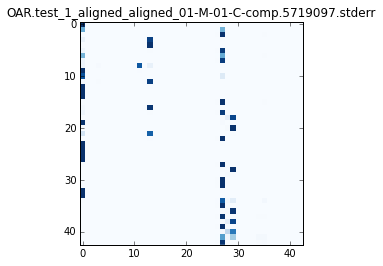

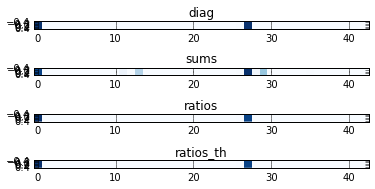

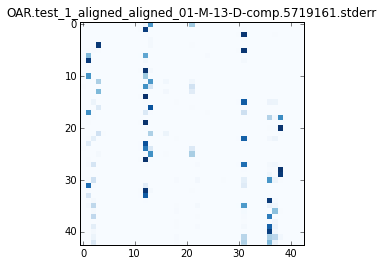

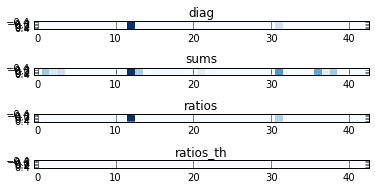

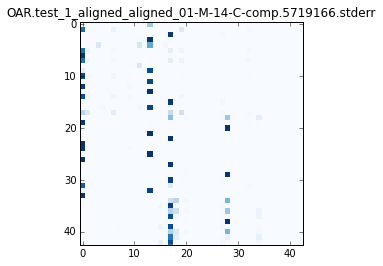

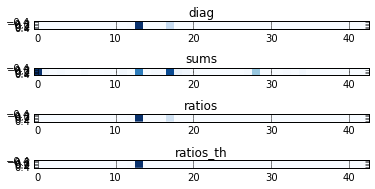

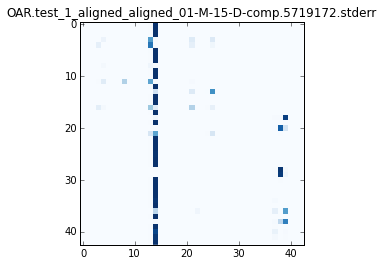

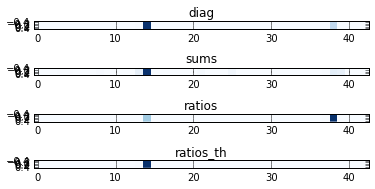

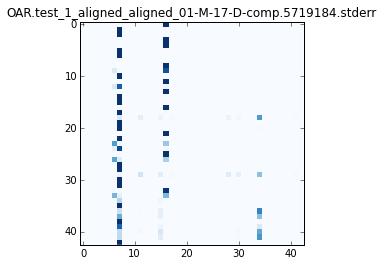

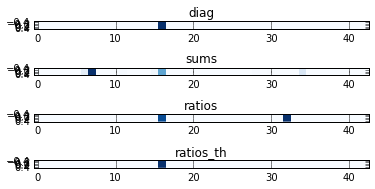

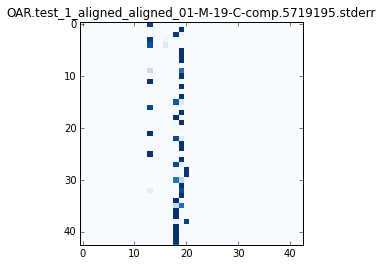

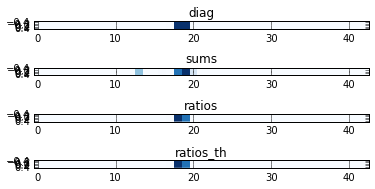

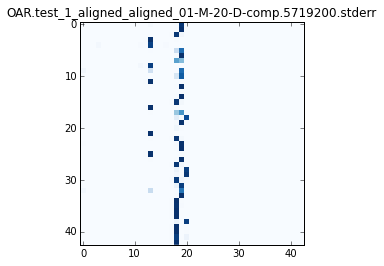

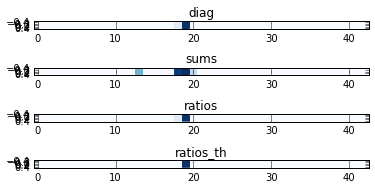

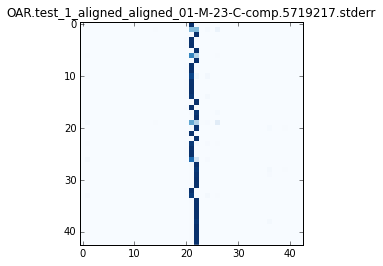

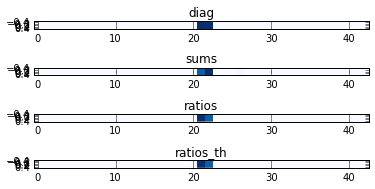

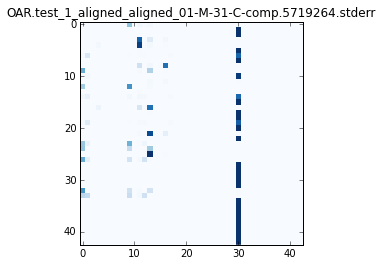

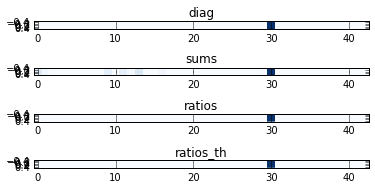

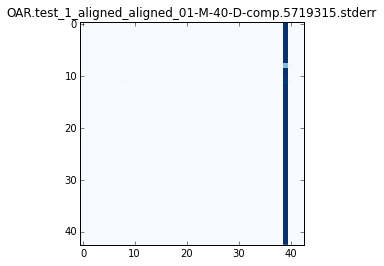

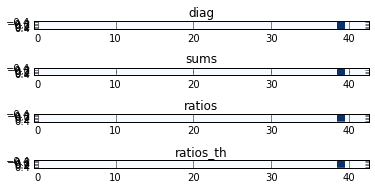

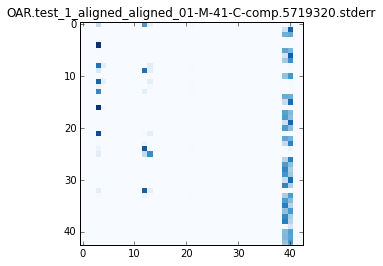

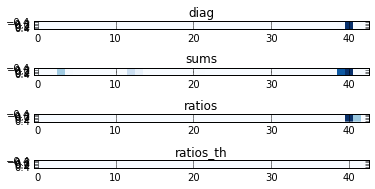

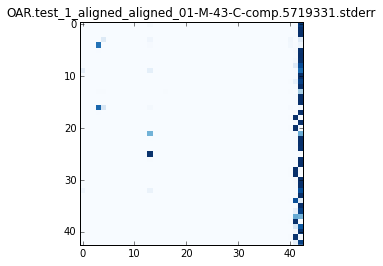

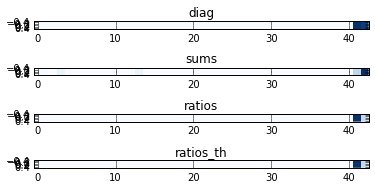

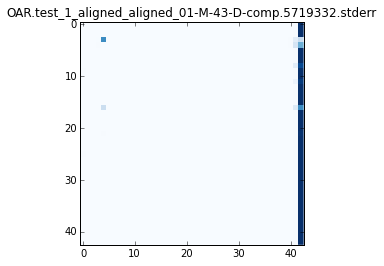

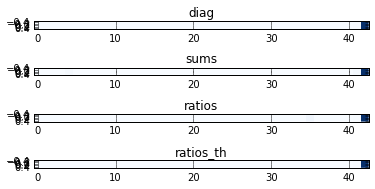

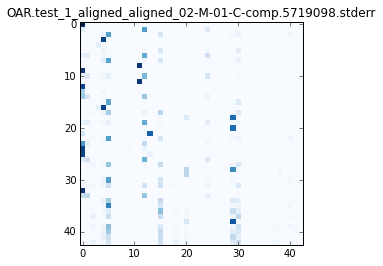

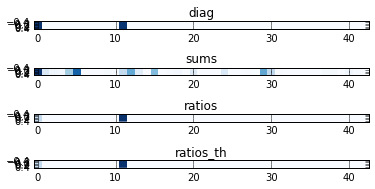

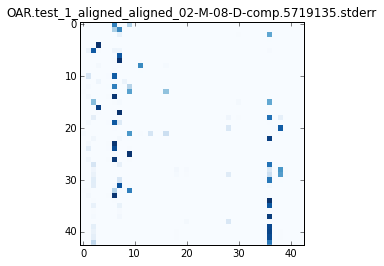

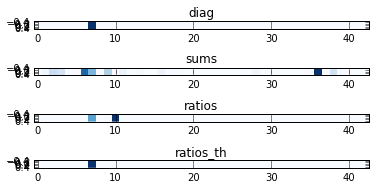

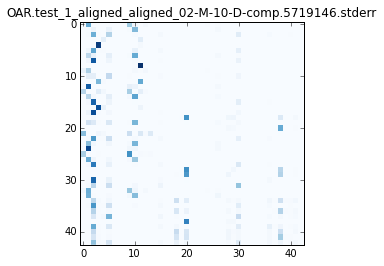

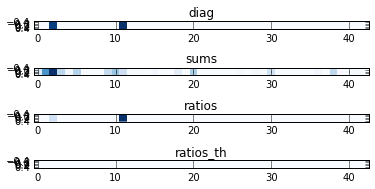

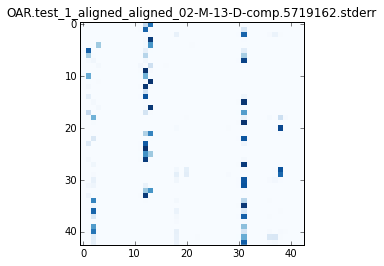

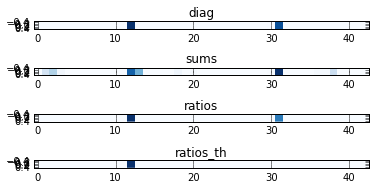

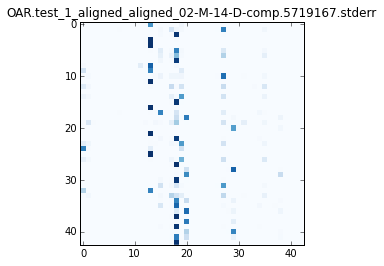

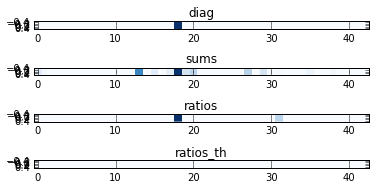

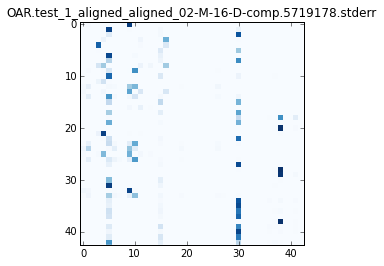

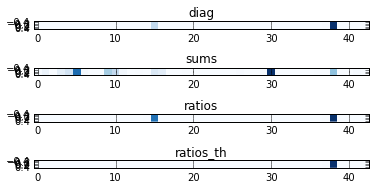

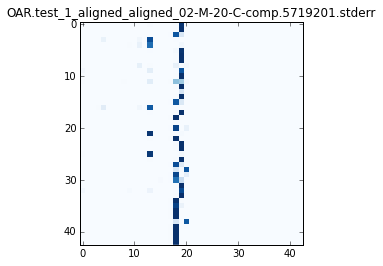

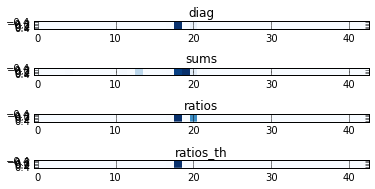

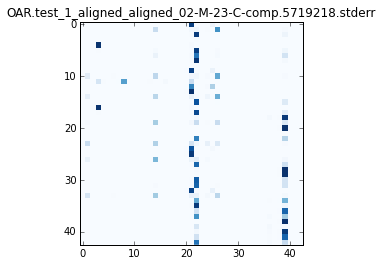

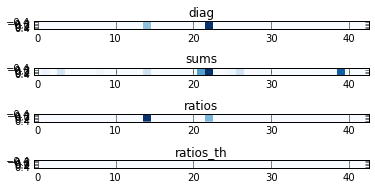

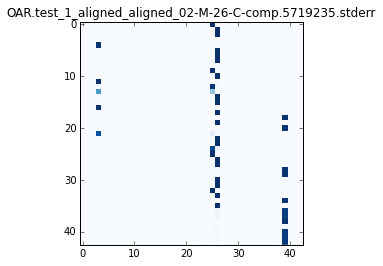

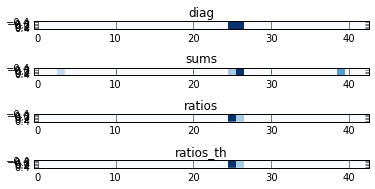

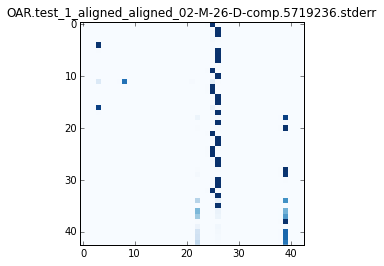

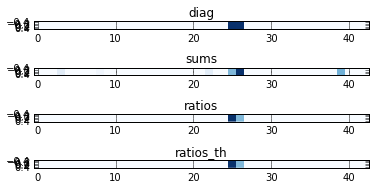

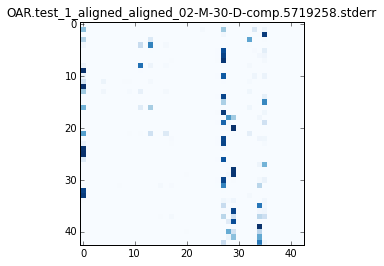

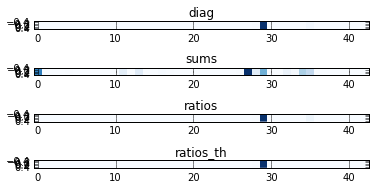

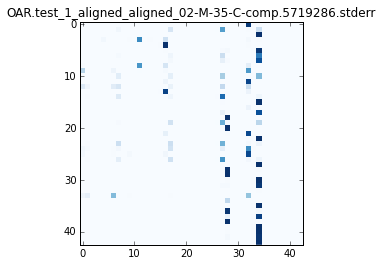

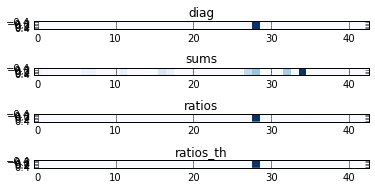

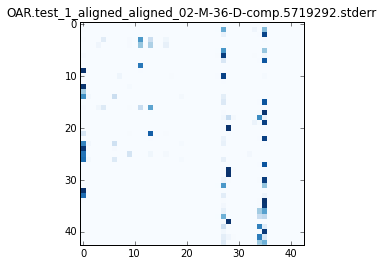

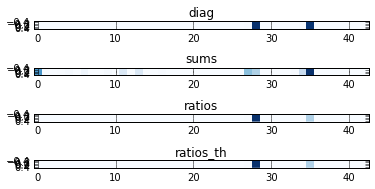

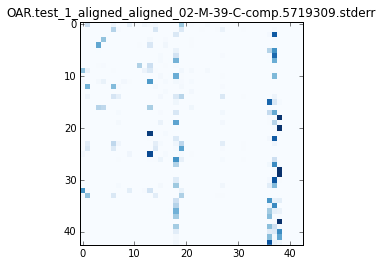

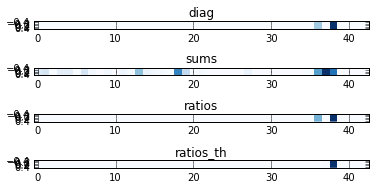

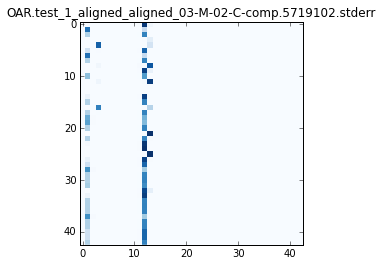

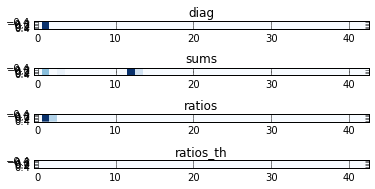

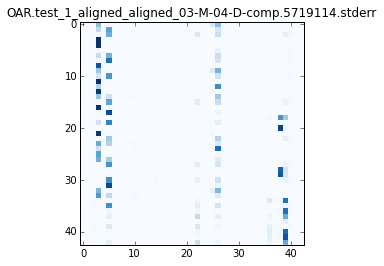

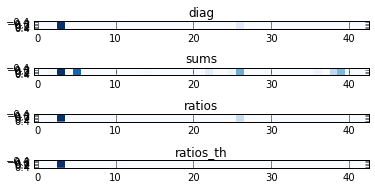

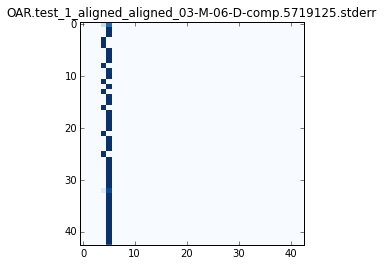

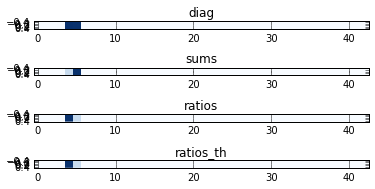

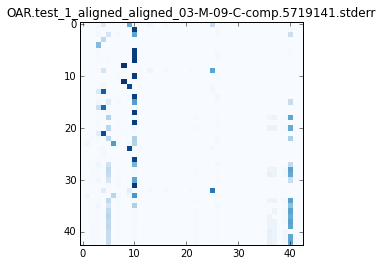

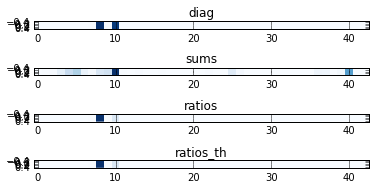

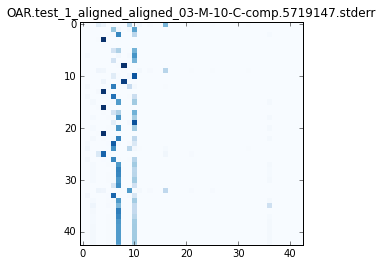

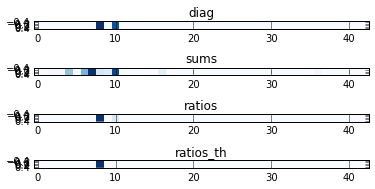

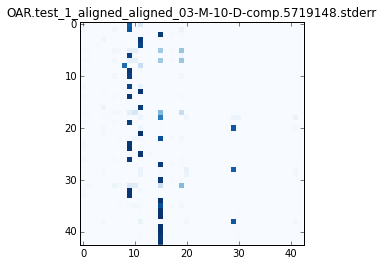

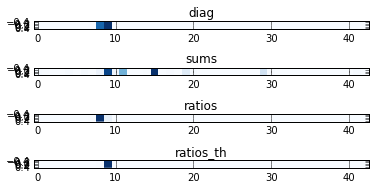

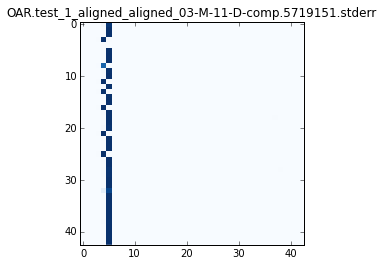

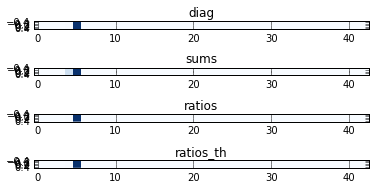

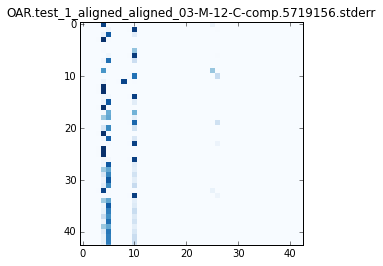

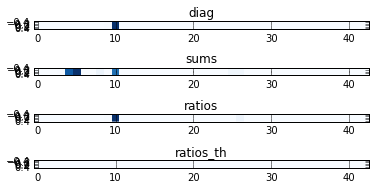

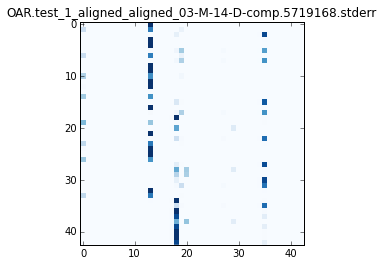

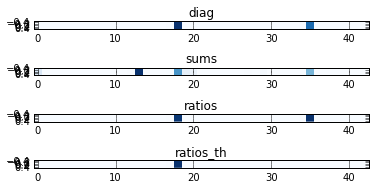

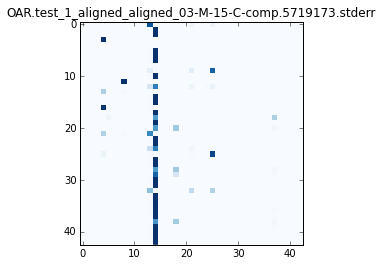

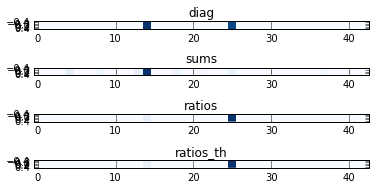

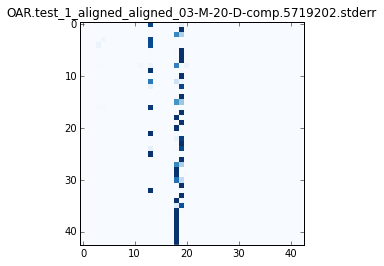

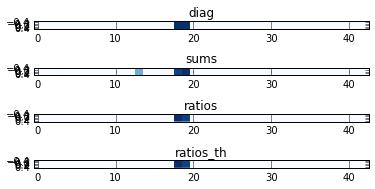

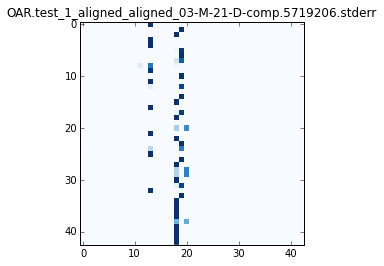

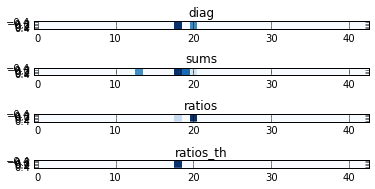

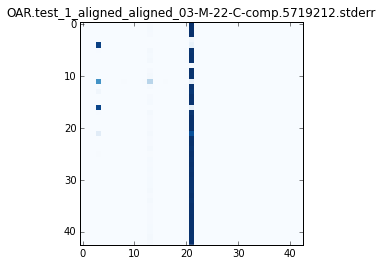

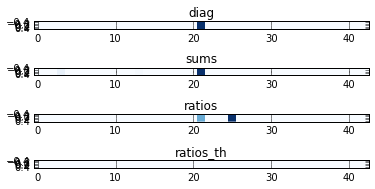

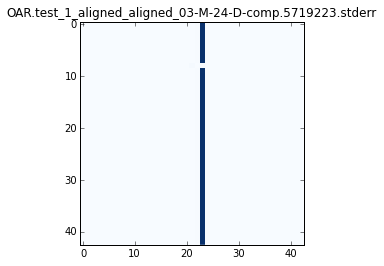

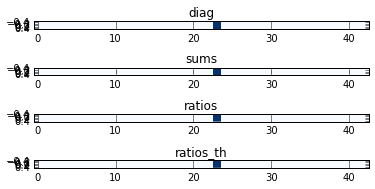

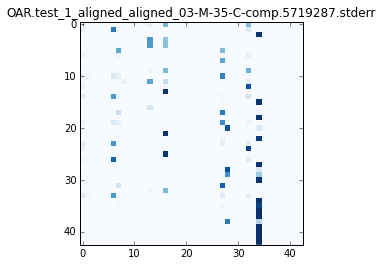

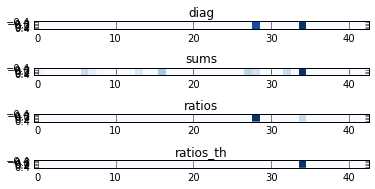

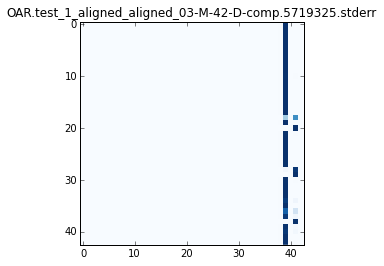

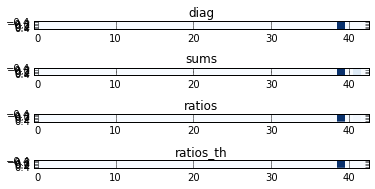

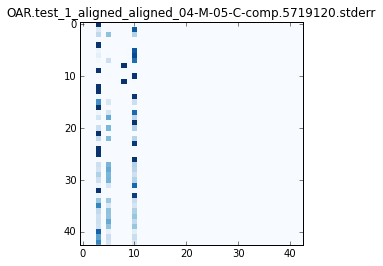

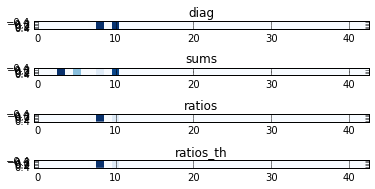

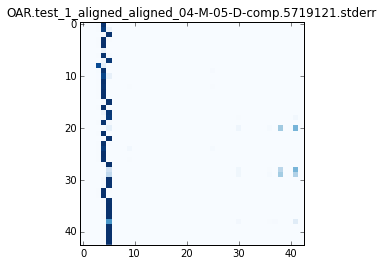

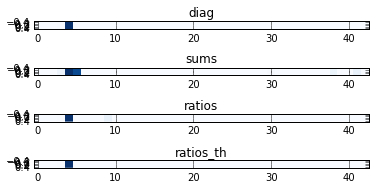

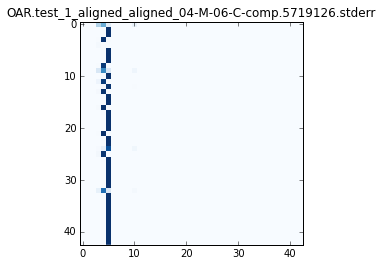

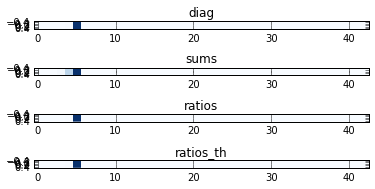

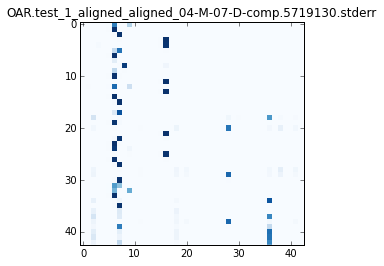

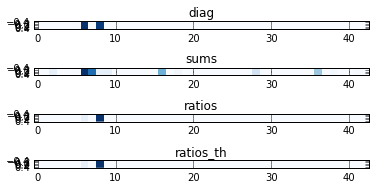

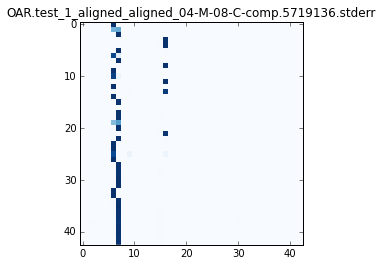

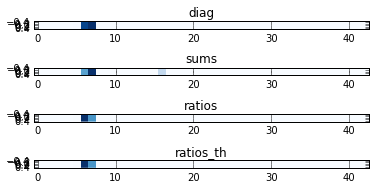

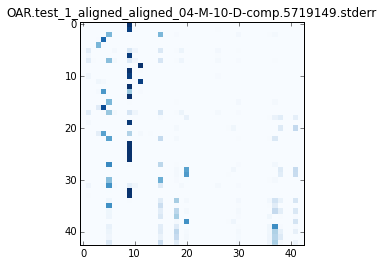

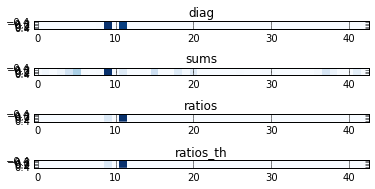

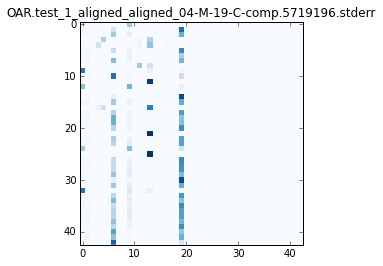

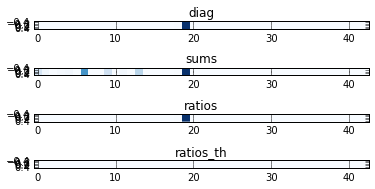

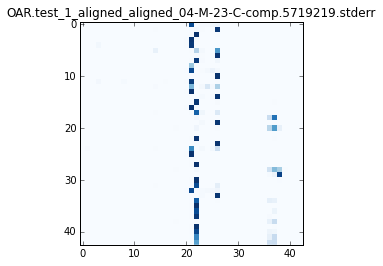

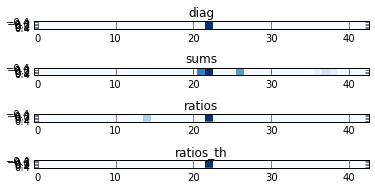

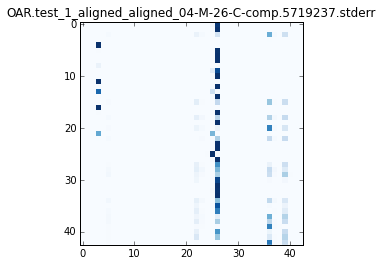

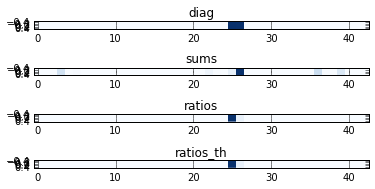

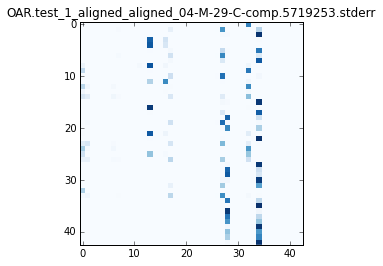

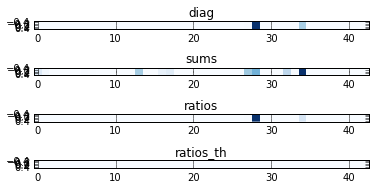

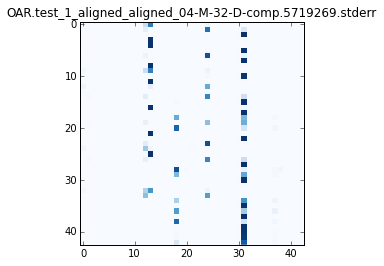

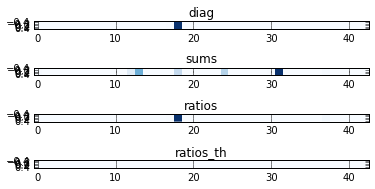

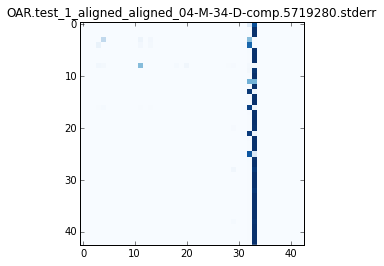

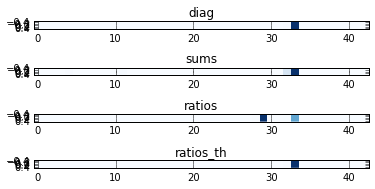

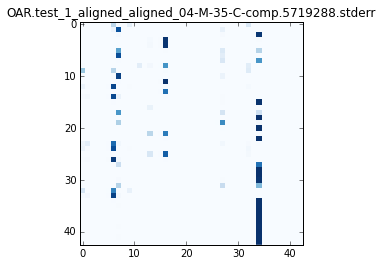

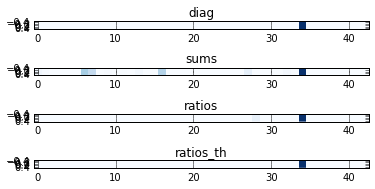

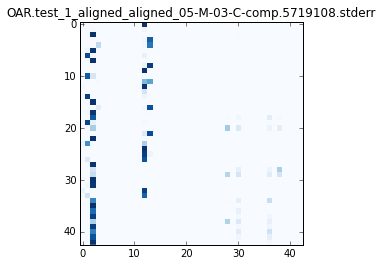

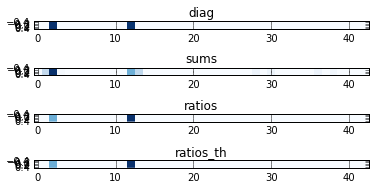

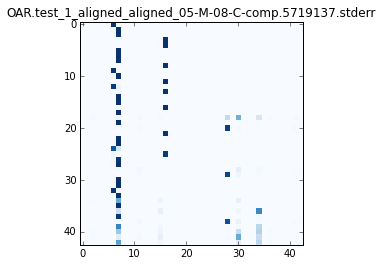

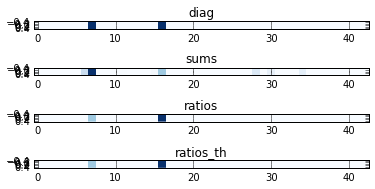

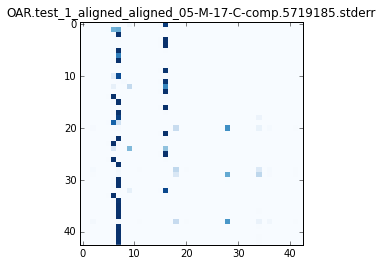

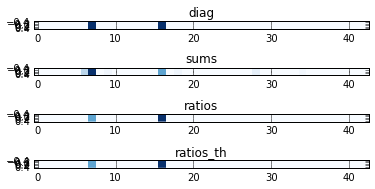

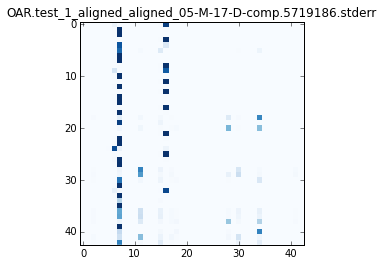

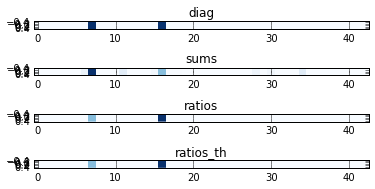

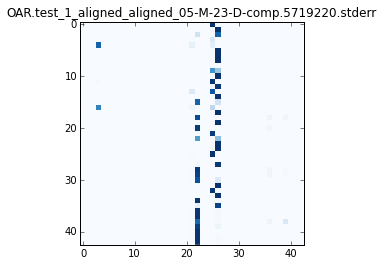

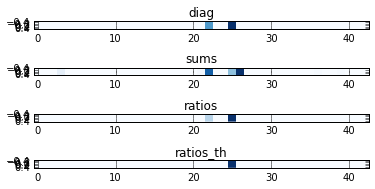

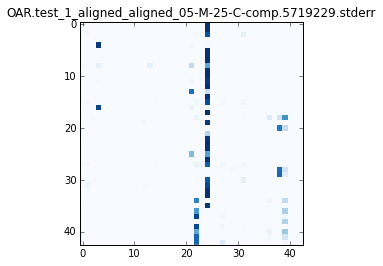

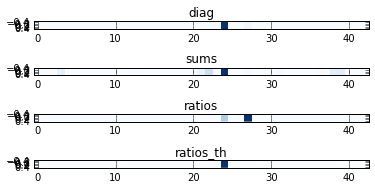

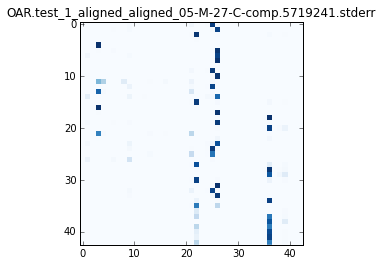

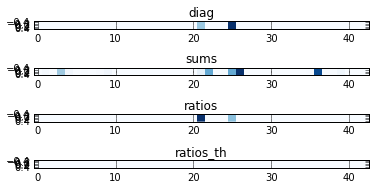

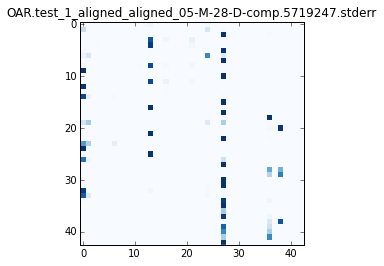

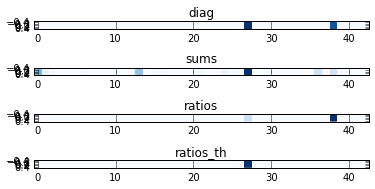

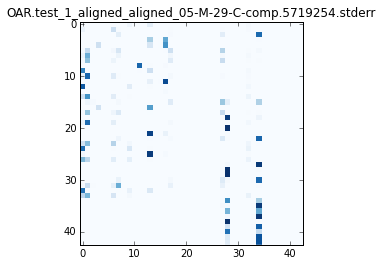

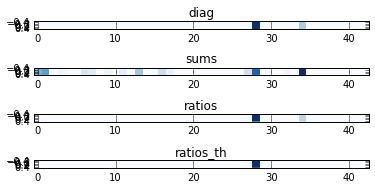

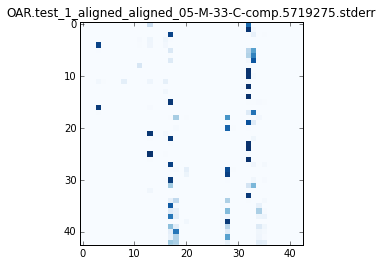

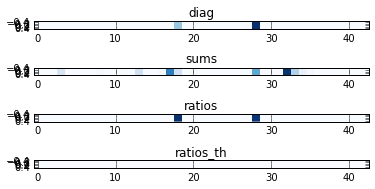

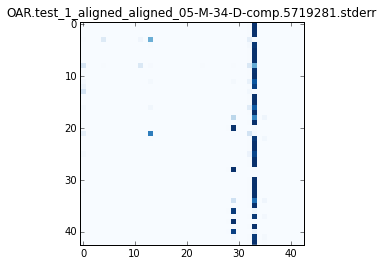

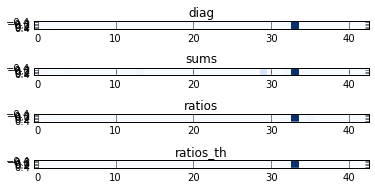

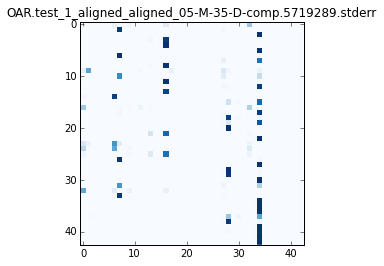

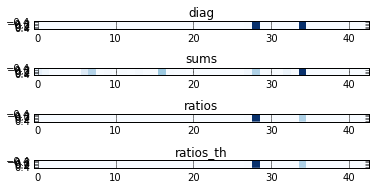

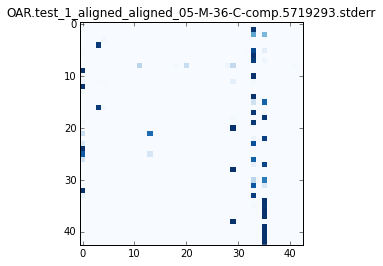

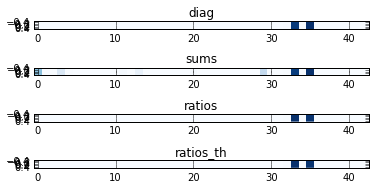

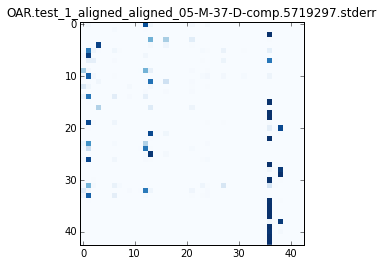

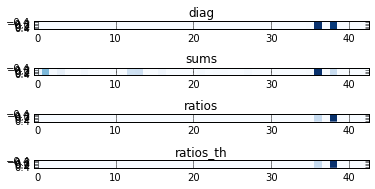

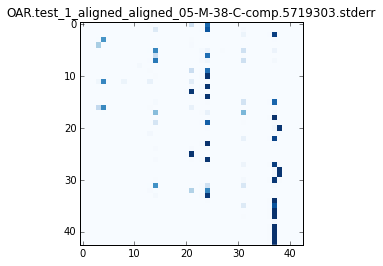

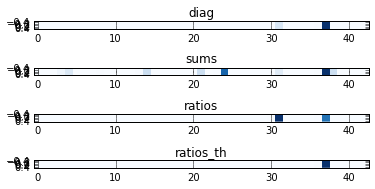

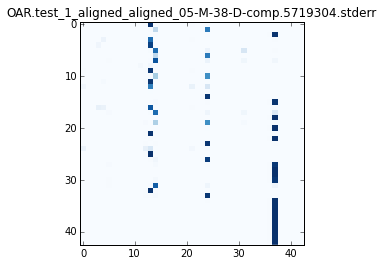

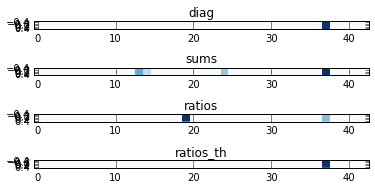

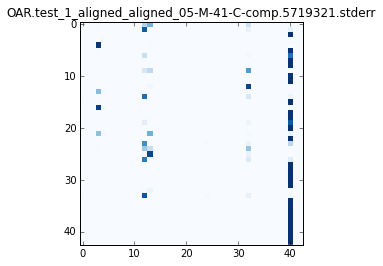

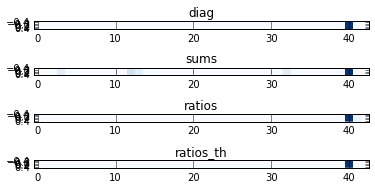

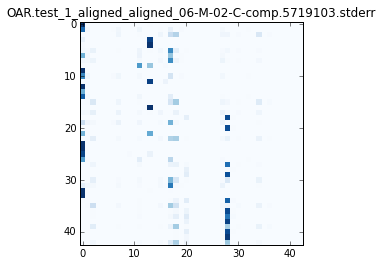

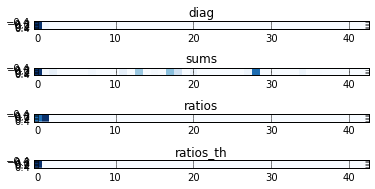

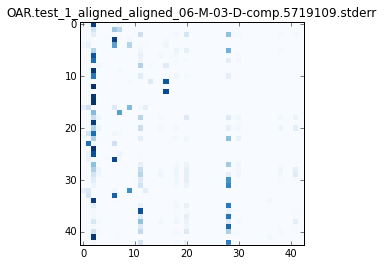

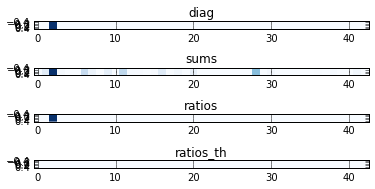

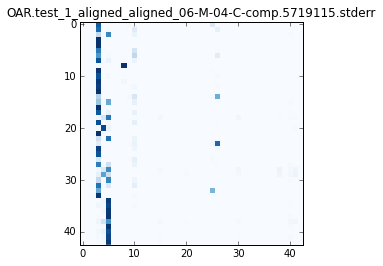

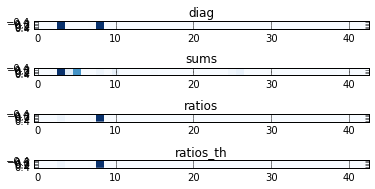

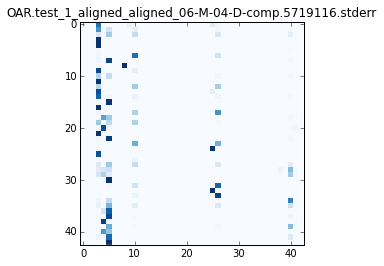

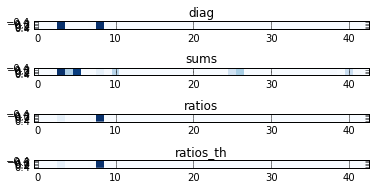

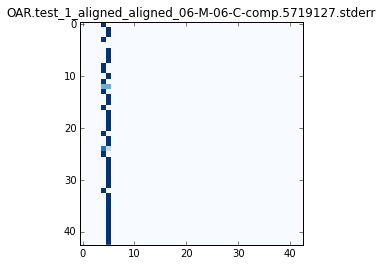

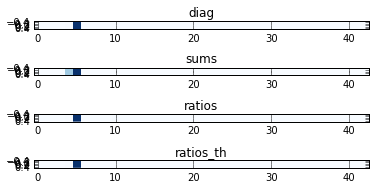

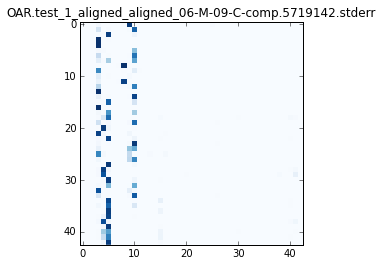

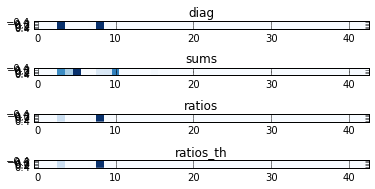

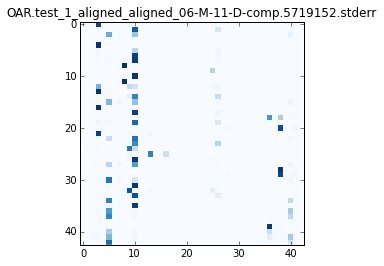

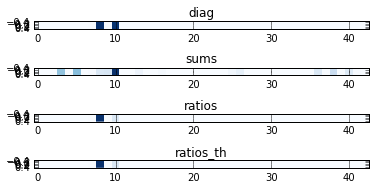

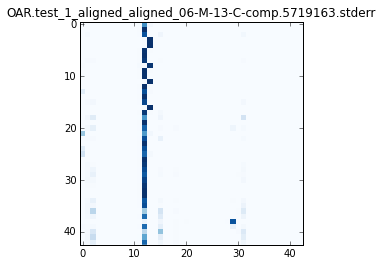

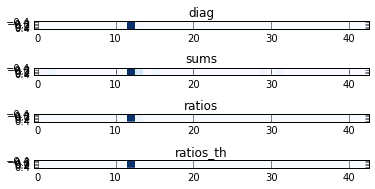

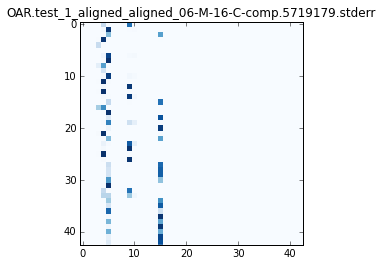

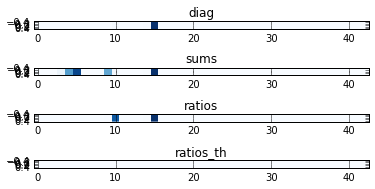

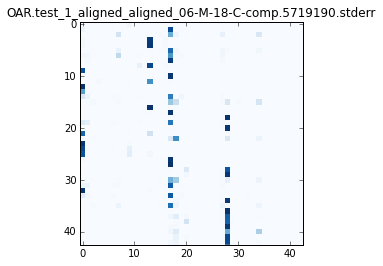

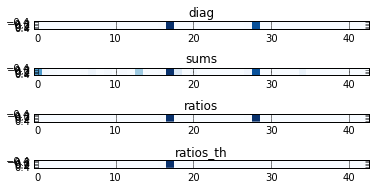

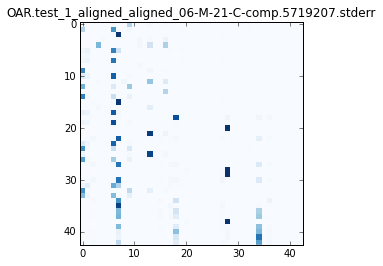

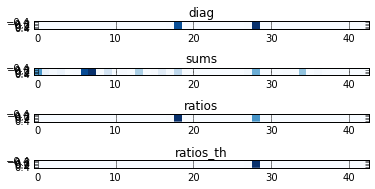

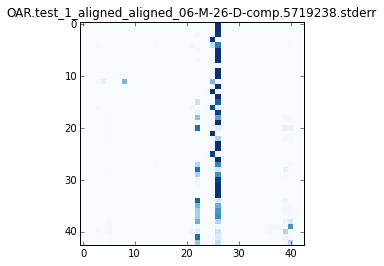

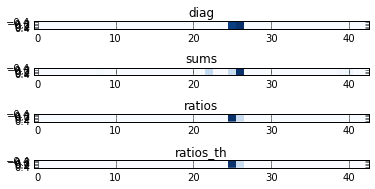

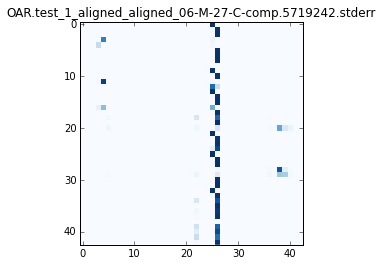

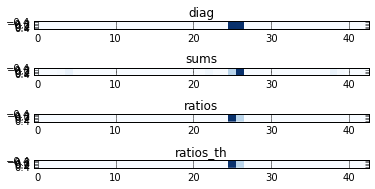

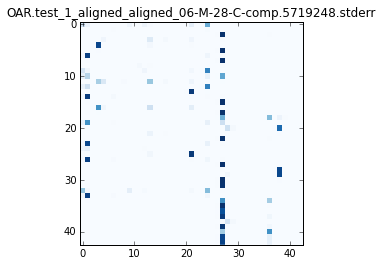

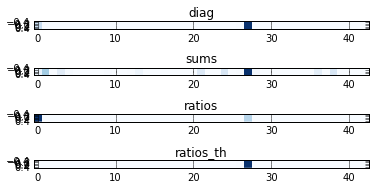

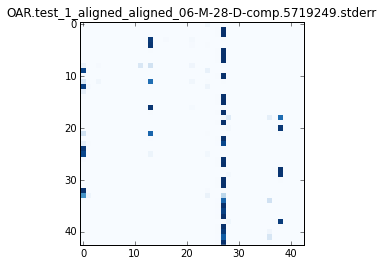

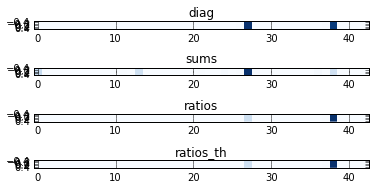

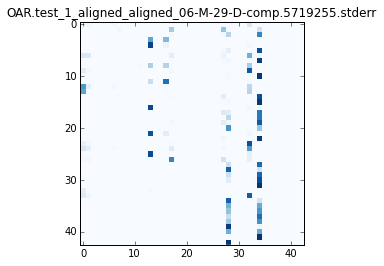

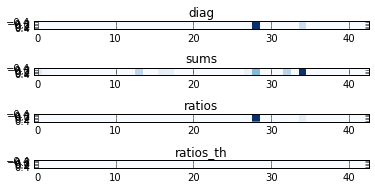

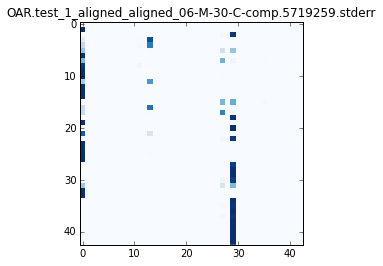

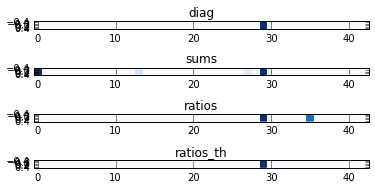

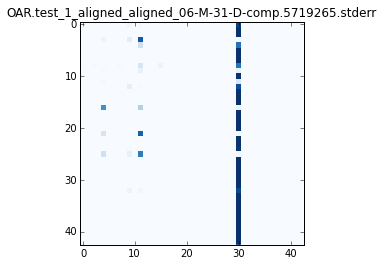

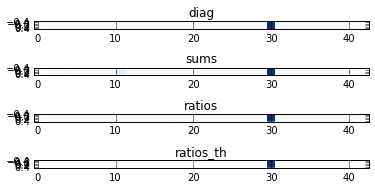

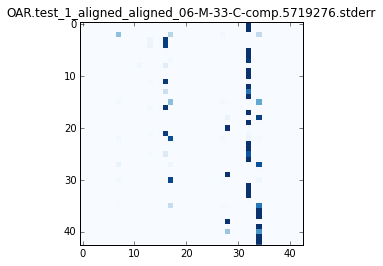

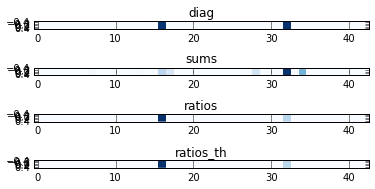

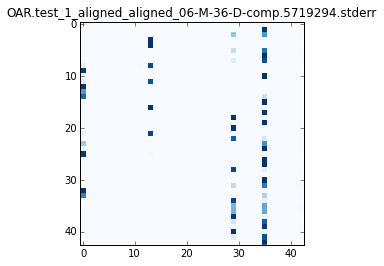

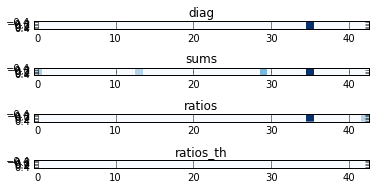

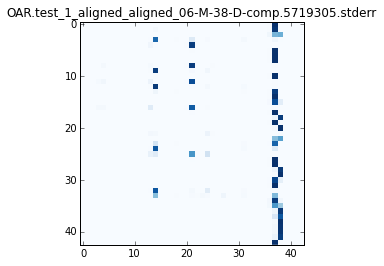

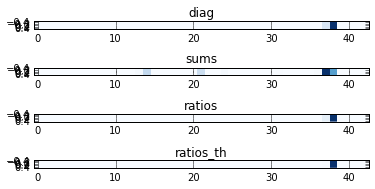

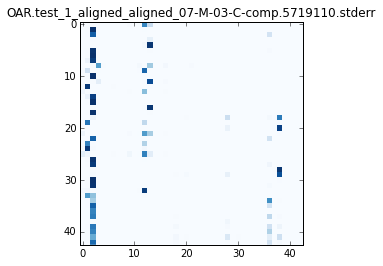

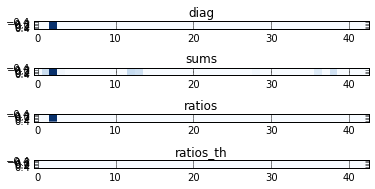

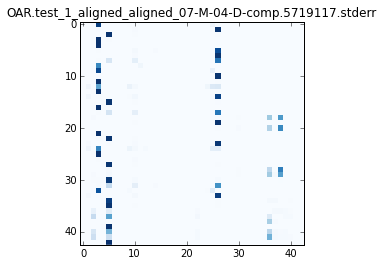

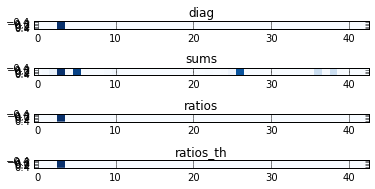

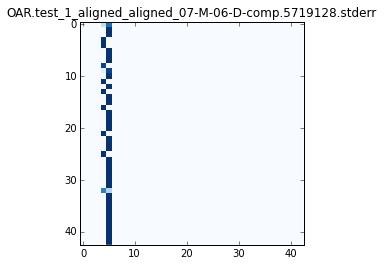

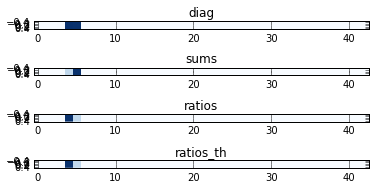

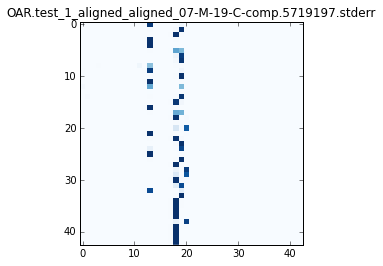

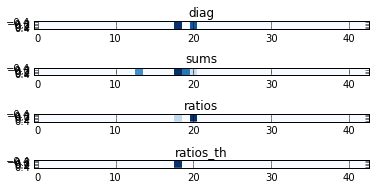

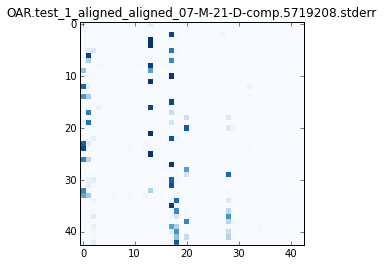

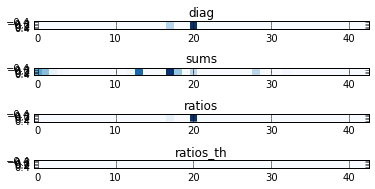

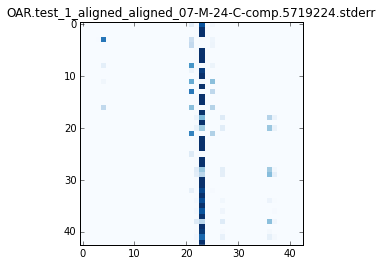

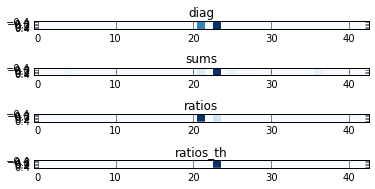

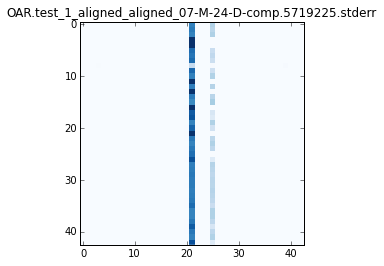

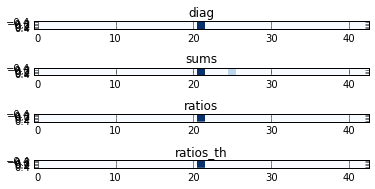

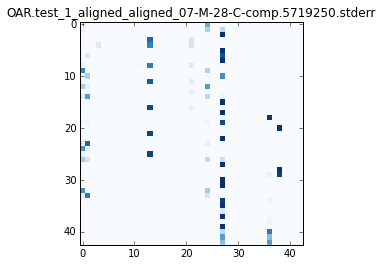

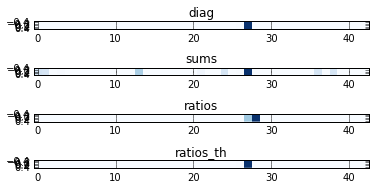

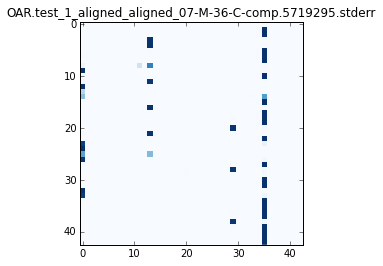

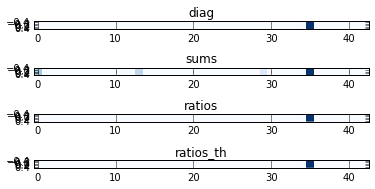

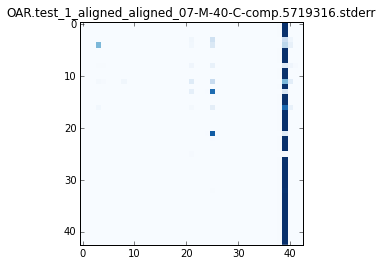

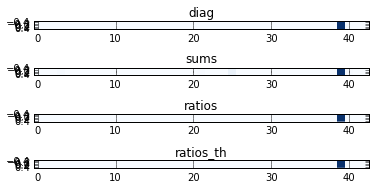

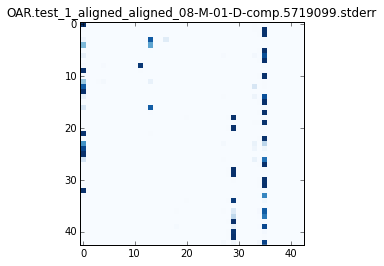

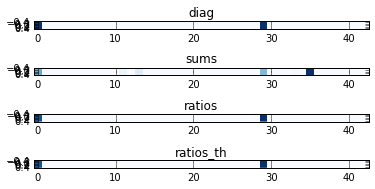

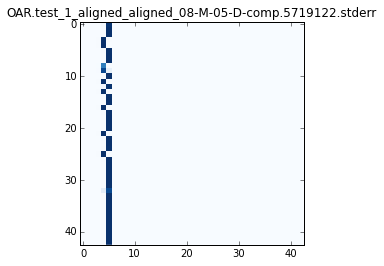

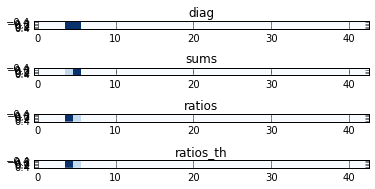

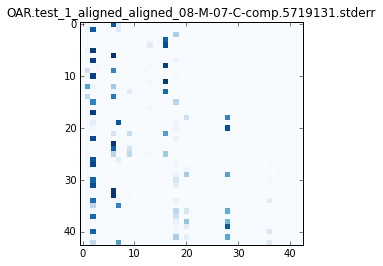

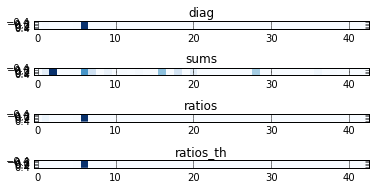

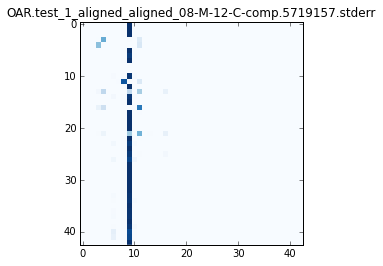

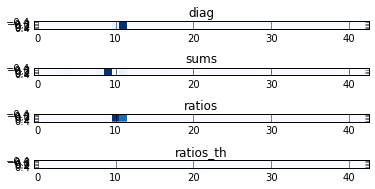

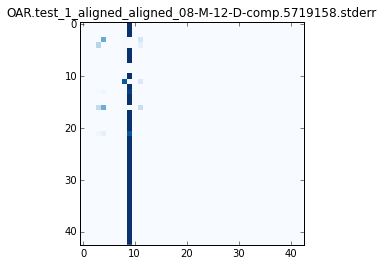

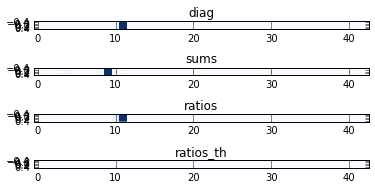

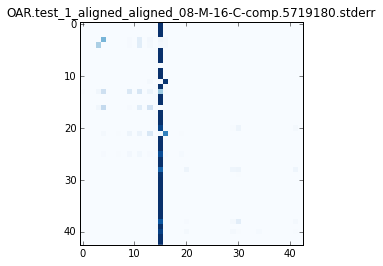

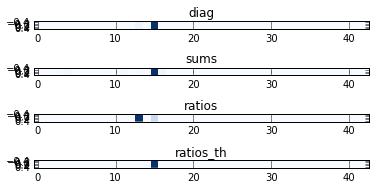

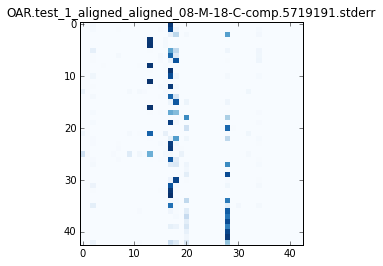

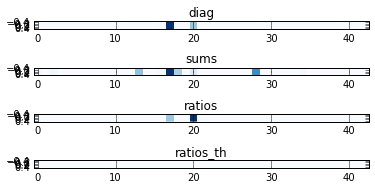

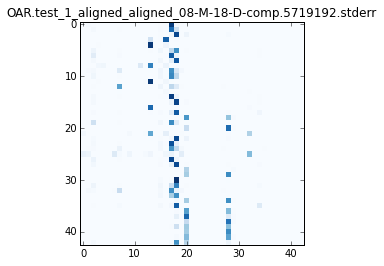

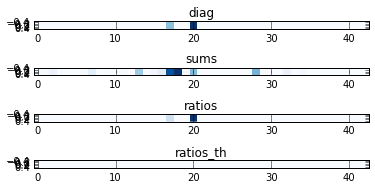

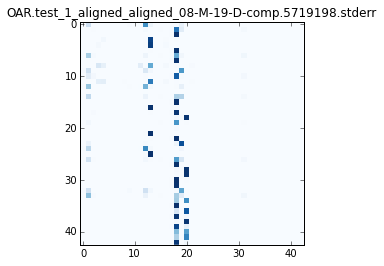

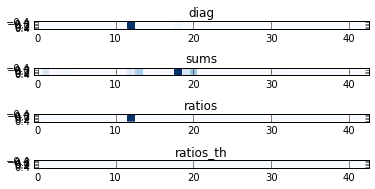

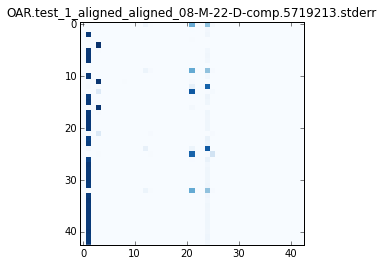

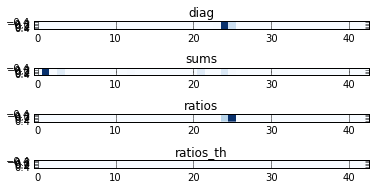

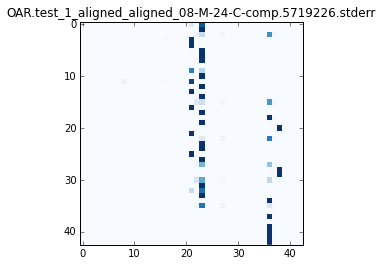

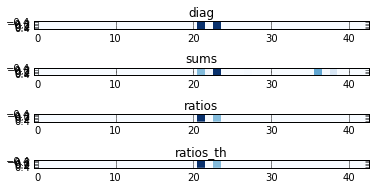

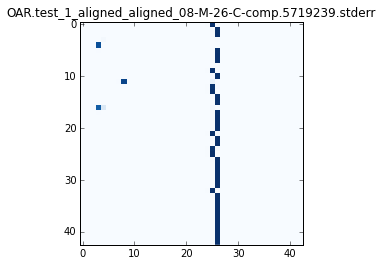

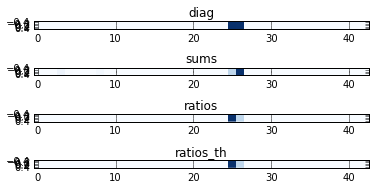

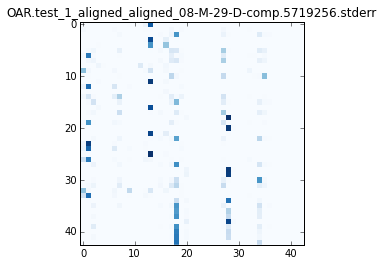

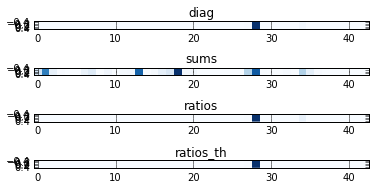

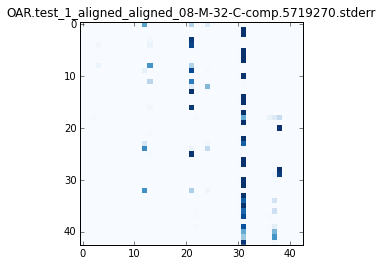

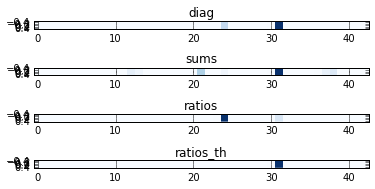

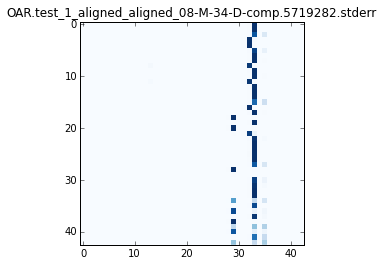

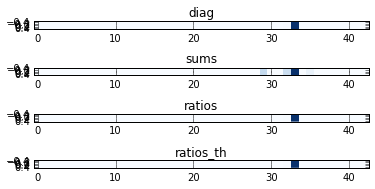

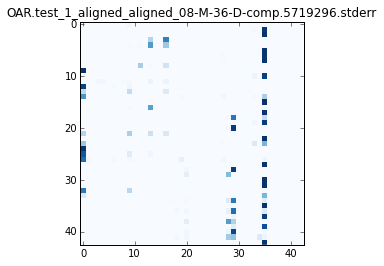

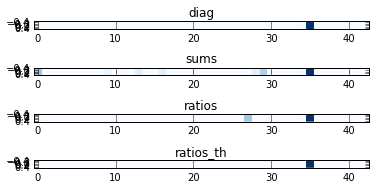

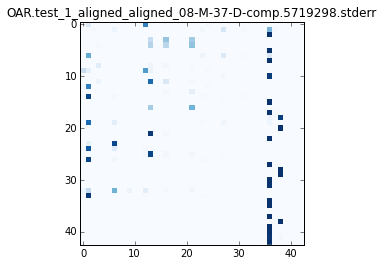

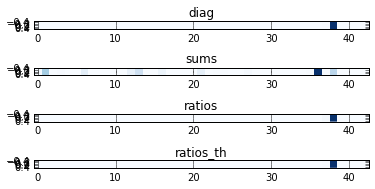

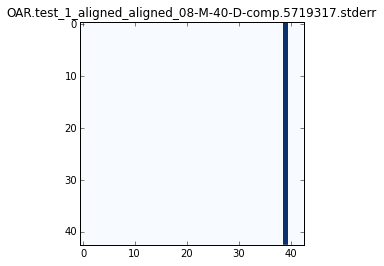

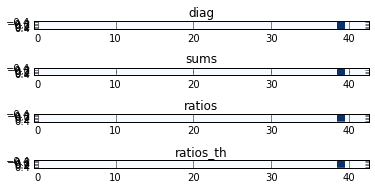

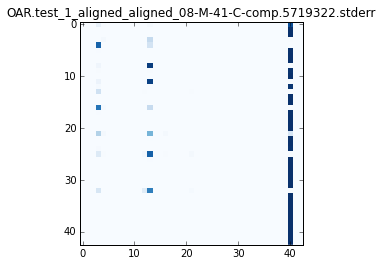

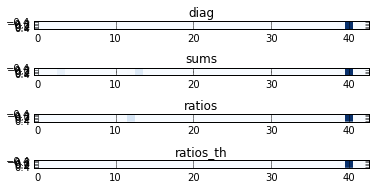

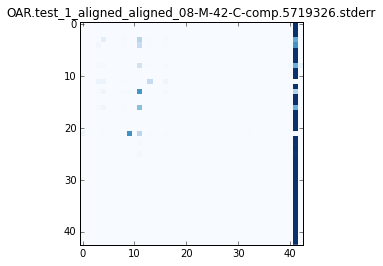

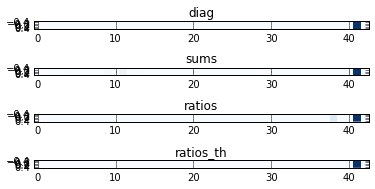

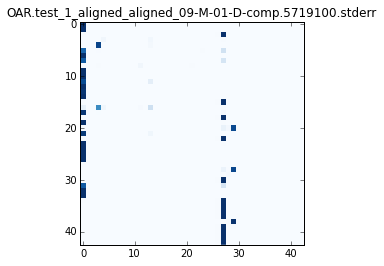

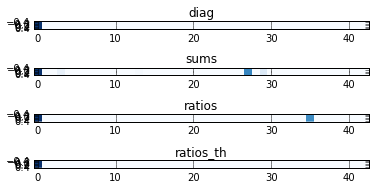

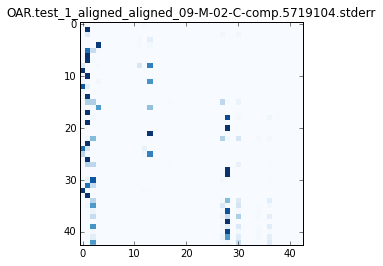

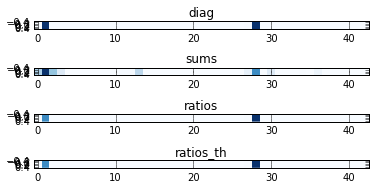

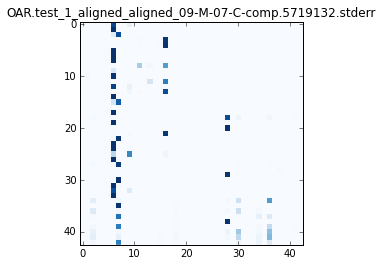

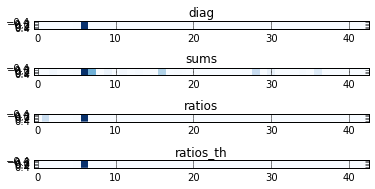

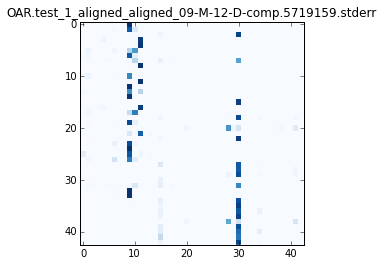

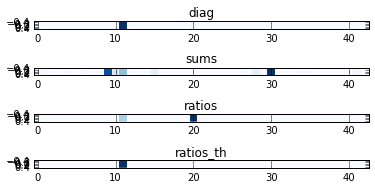

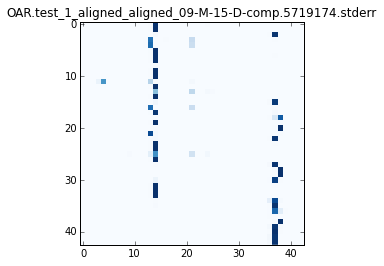

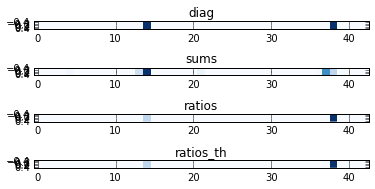

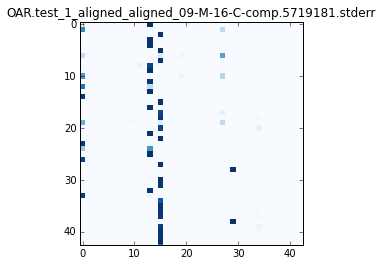

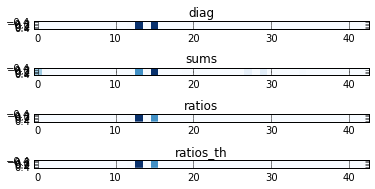

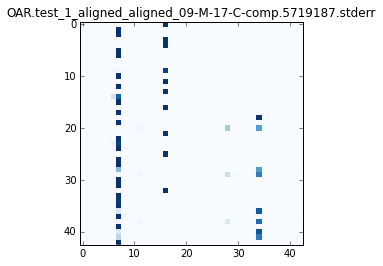

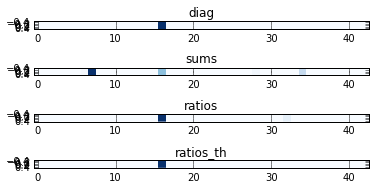

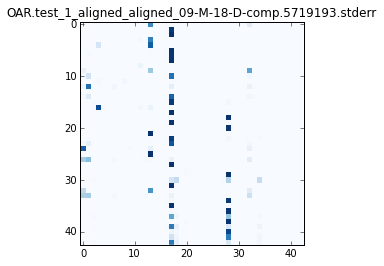

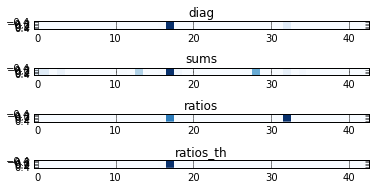

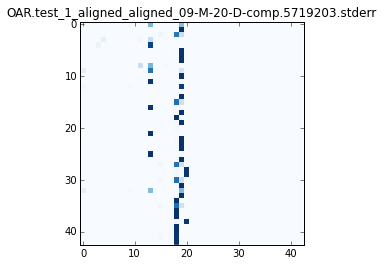

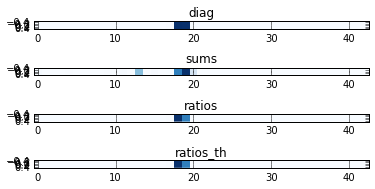

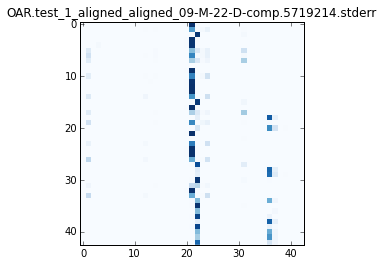

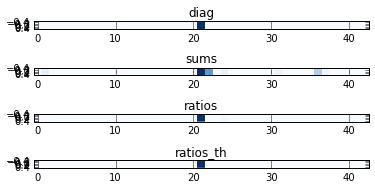

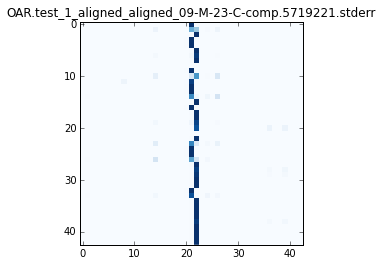

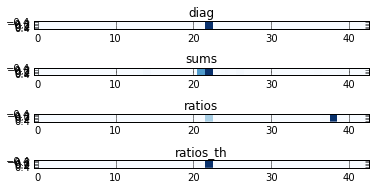

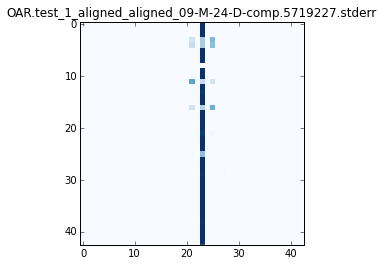

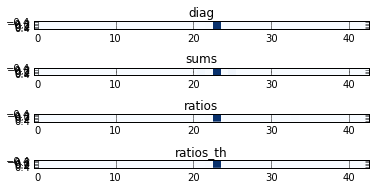

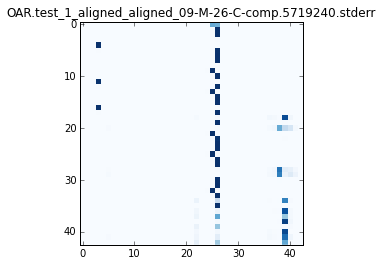

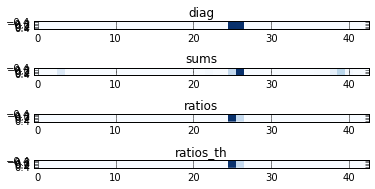

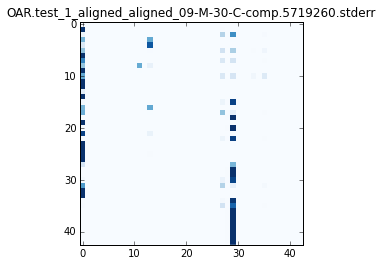

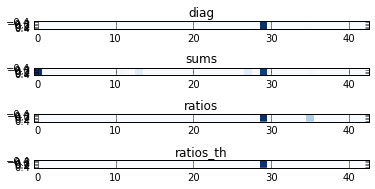

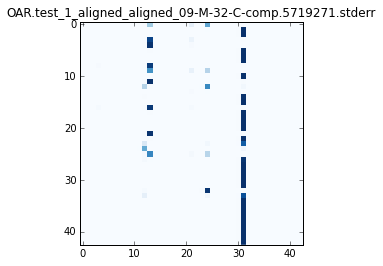

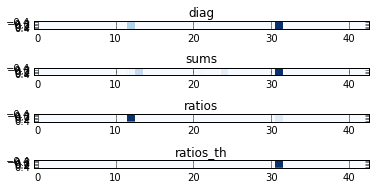

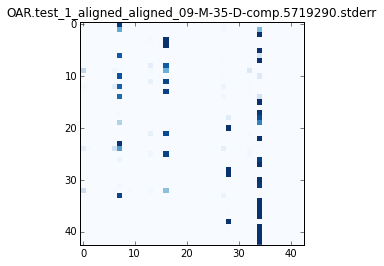

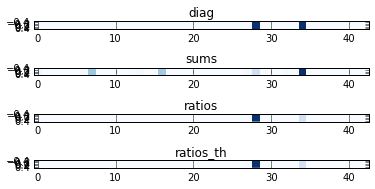

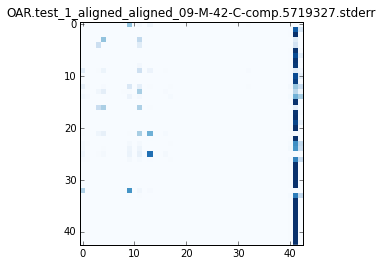

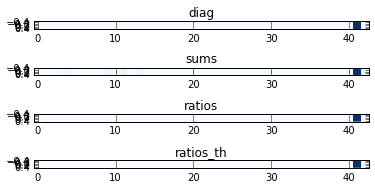

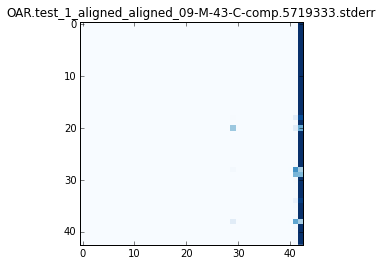

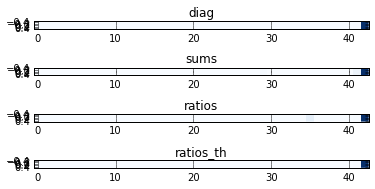

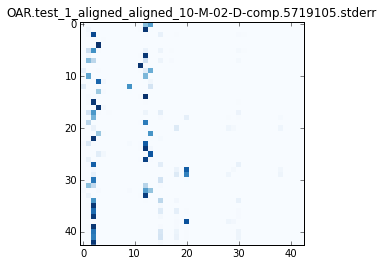

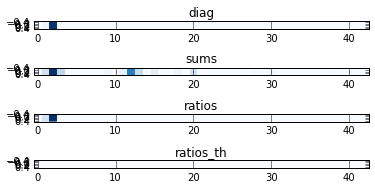

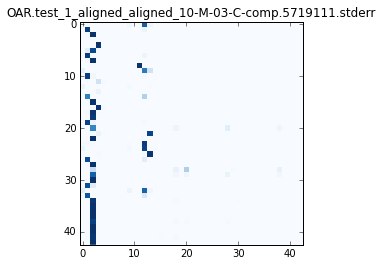

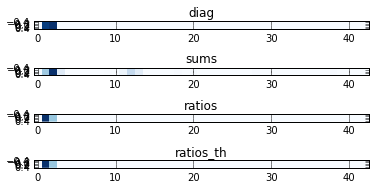

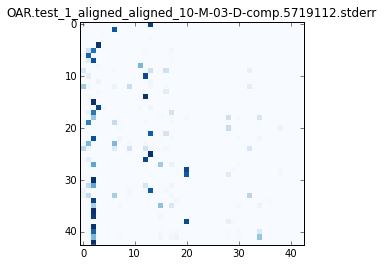

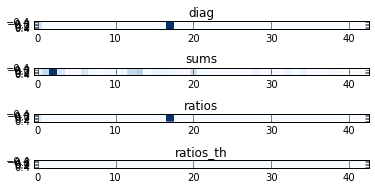

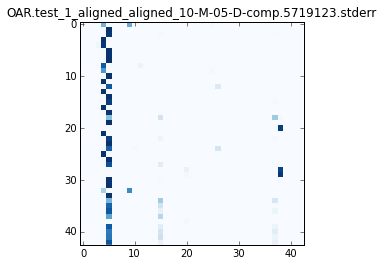

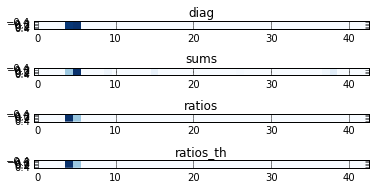

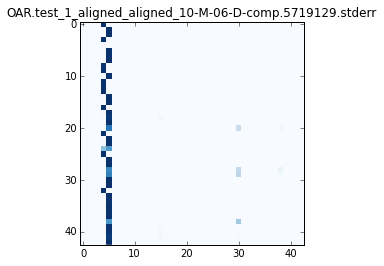

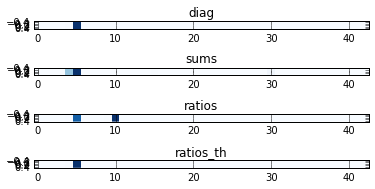

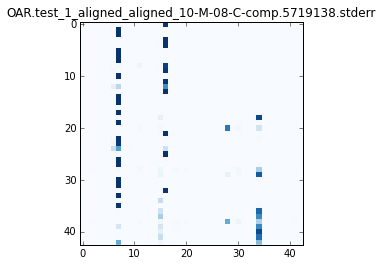

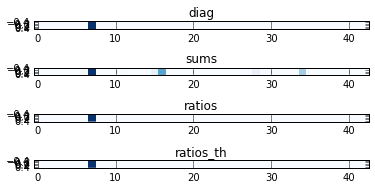

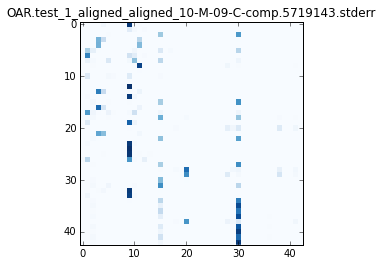

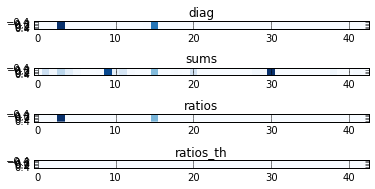

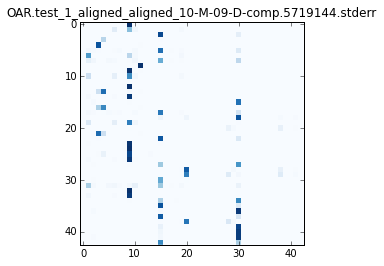

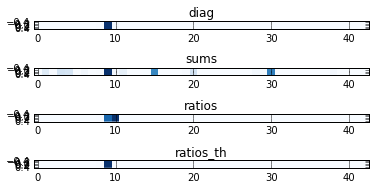

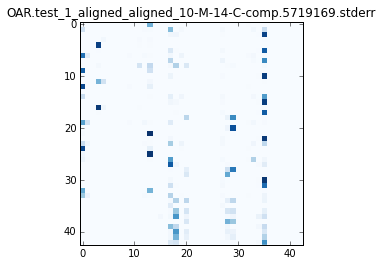

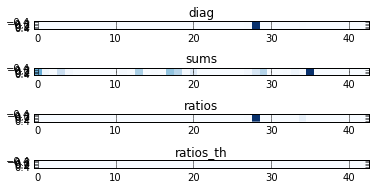

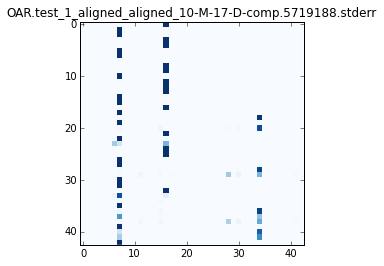

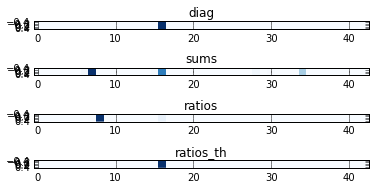

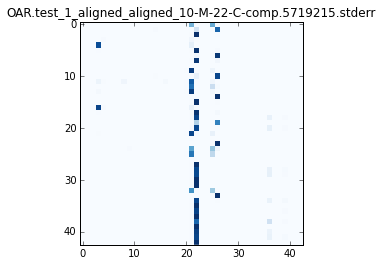

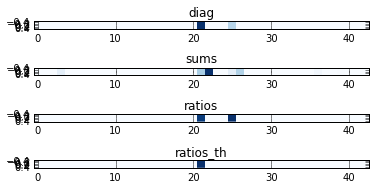

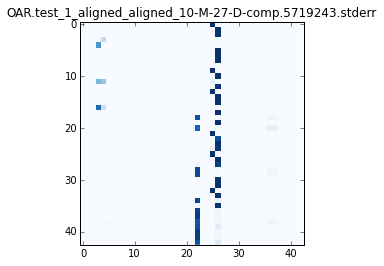

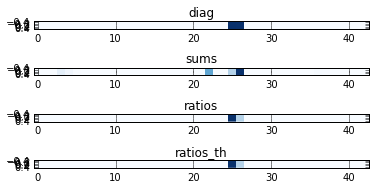

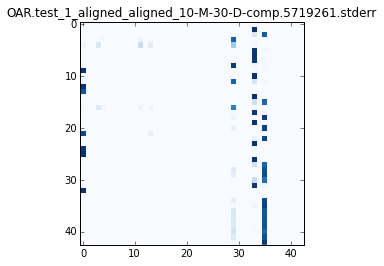

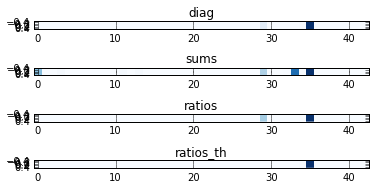

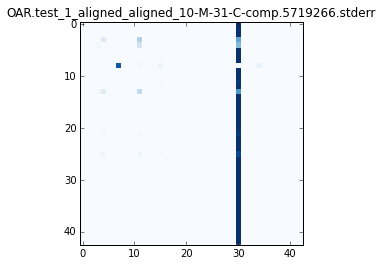

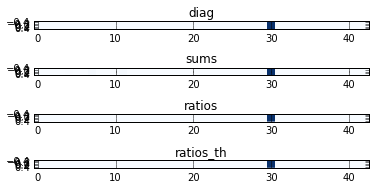

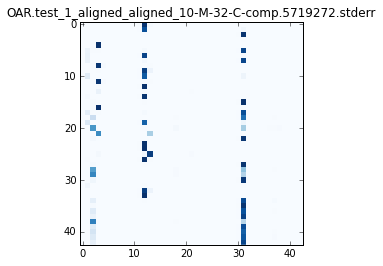

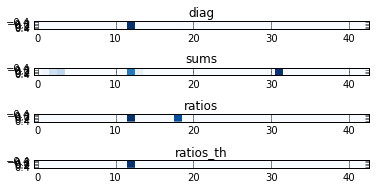

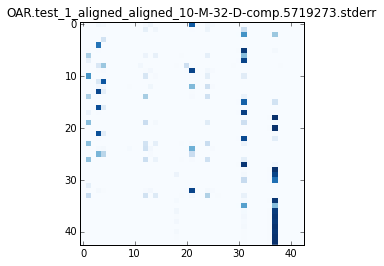

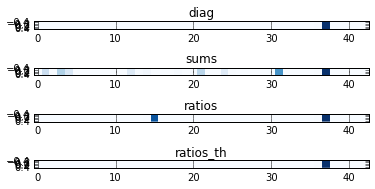

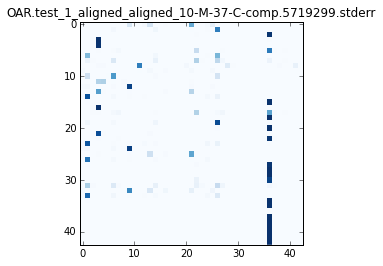

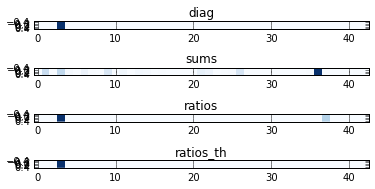

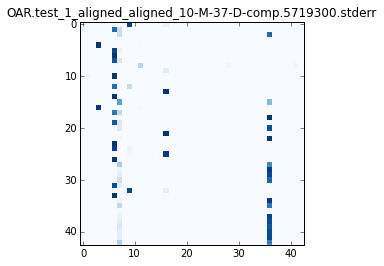

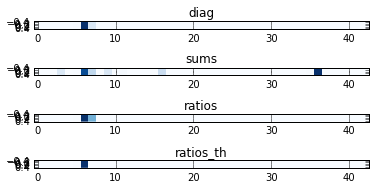

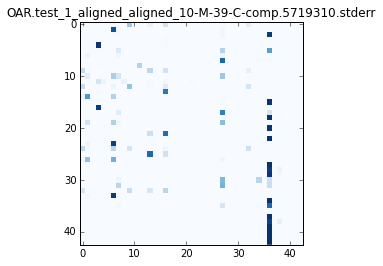

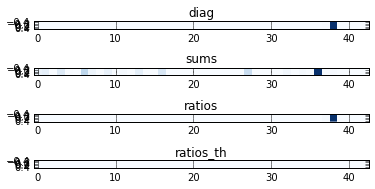

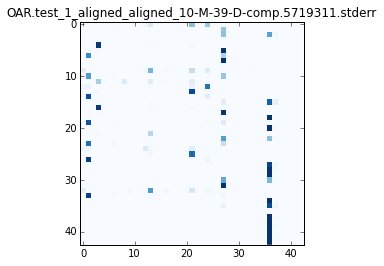

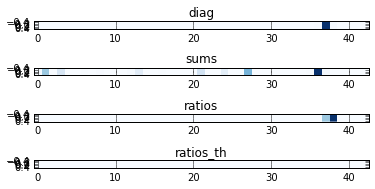

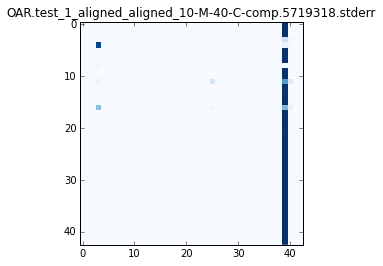

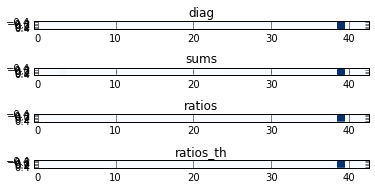

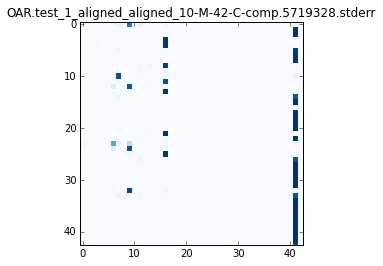

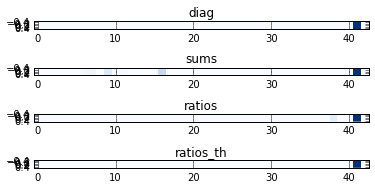

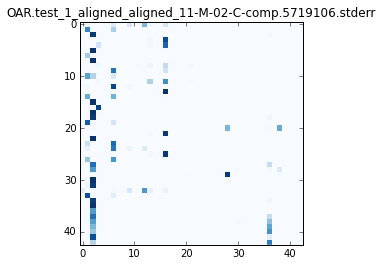

In [ ]:

dfs = []
correct = 0
correct_ratios = 0
correct_ratios_th = 0
correct_sum = 0
total = 0
topN_names=select_Top_N(baseline_log,N,test_samples_file)

for log_file in log_files:
    print("Parsing:", log_file)
    m = parse_log(os.path.join(input_folder, log_file))
    if len(m.shape) <= 1:
        continue
    
    if m.shape[0] != m.shape[1]:
        continue
    
   # for i in (range(len(m))):
    #    mult=np.array(43)
     #   for i in
      #  line=m[i]
    #TODO take name
    name=log_file.split("_")[-1].split(".")[0]
    correct_class = int(log_file.split('-')[2])
    topN=topN_names[name]
    print("TOPN: ",topN)
    for cl in range(43):
        if cl not in topN:
            m[cl,cl]=0
            #continue
    print(m)    
    diag = m.diagonal()
    y_pred = np.argmax(diag)
    
    predicted_class = y_pred + 1
    
    
    #print('\tIndex:', y_pred)
    print('\tCorrect class: ', correct_class)
    print('\tPredicted Class:', predicted_class)
    print('Probability:', diag[y_pred])
    #print('Diagonal: ', diag)

    total += 1
    if correct_class == predicted_class:
        correct += 1
    
    sums = np.apply_along_axis(np.sum, 0, m)
    ratios = diag / sums
    ratios_th = ratios.copy()
    ratios_th[diag < threshold] = 0
    y_pred = np.argmax(ratios_th)

    max_ratios = np.argmax(ratios) + 1
    max_ratios_th = np.argmax(ratios_th) + 1
    max_sums=np.argmax(sums)+1
    
    if correct_class == max_ratios:
        correct_ratios += 1
    
    if correct_class == max_ratios_th:
        correct_ratios_th += 1
        
    if correct_class == max_sums:
        correct_sum += 1
    
    
    plt.figure()
    plt.title(log_file)
    plt.imshow(m, interpolation='none', cmap='Blues')

    plt.figure()
    plt.subplot(511)
    plt.title("diag")
    plt.imshow(diag.reshape((1, 43)), interpolation='none', cmap='Blues')

    plt.subplot(512)
    plt.title("sums")
    plt.imshow(sums.reshape((1, 43)), interpolation='none', cmap='Blues')

    plt.subplot(513)
    plt.title("ratios")
    plt.imshow(ratios.reshape((1, 43)), interpolation='none', cmap='Blues')

    plt.subplot(514)
    plt.title("ratios_th")
    plt.imshow(ratios_th.reshape((1, 43)),
               interpolation='none', cmap='Blues')
    
#     df = pd.DataFrame(m)
#     dfs.append(df)
total=float(total)
correct=float(correct)
correct_sum=float(correct_sum)
print('Sum: ',correct_sum/total)
print('Total: ', total)
print('Correct: ', correct)
print('Acc overall: ', correct/total)
print('Acc ratios: ', correct_ratios/total)
print('Acc ratios th: ', correct_ratios_th/total)